# **EDA**

### Realizaremos un `E`xploratory `D`ata `A`nalysis (`EDA`) sobre los datos de interés para examinarlos con más en detalle

---

In [2]:
# Librerias a utilizar
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

---

#### Datos globales de terremotos de 1970 a 2023 :

##### `Diccionario de datos`

+    index: Un identificador único para cada fila en el DataFrame.
+    mag: La magnitud del terremoto en la escala de Richter.
+    place: La ubicación geográfica del terremoto.
+    felt: La cantidad de personas que reportaron haber sentido el terremoto.
+    cdi: La intensidad del terremoto según la escala de Intensidad de Daño Comunitario (CDI, por sus siglas en inglés).
+    mmi: La intensidad del terremoto según la escala de Intensidad de Mercalli Modificada (MMI, por sus siglas en inglés).
+    tsunami: Un valor binario que indica si el terremoto produjo un tsunami o no.
+    sig: La significancia del terremoto en función de su magnitud y distancia.
+    net: La red sismológica que registró el terremoto.
+    code: Un código identificador único para cada terremoto.
+    types: Los tipos de datos que se proporcionan para el terremoto.
+    nst: El número de estaciones que registraron el terremoto.
+    dmin: La distancia mínima a la fuente del terremoto.
+    rms: La amplitud máxima de las ondas sísmicas registradas.
+    gap: El ángulo entre las estaciones más lejanas que registraron el terremoto.
+    magType: El tipo de magnitud reportado para el terremoto.
+    type: El tipo de evento sísmico, que en este caso siempre será un terremoto.
+    year: El año en que ocurrió el terremoto.
+    month: El mes en que ocurrió el terremoto.


In [2]:
# Ingestamos el archivo parquet
df_global = pd.read_parquet("Datasets/Usa_Jap_Mex/terremotos_global.parquet")
# Observamos
df_global.sample(3)

,index,mag,place,felt,cdi,mmi,tsunami,sig,net,code,types,nst,dmin,rms,gap,magType,type,year,month
313659,314354,4.6,"95 km NE of Kainantu, Papua New Guinea",NaN,NaN,NaN,0,326,us,b000fjlu,",cap,impact-text,origin,phase-data,",42.0,NaN,0.97,70.8,mb,earthquake,2013,3
338671,339367,4.6,"200 km NNW of Sabang, Indonesia",0.0,1.0,NaN,0,326,us,c000syd3,",cap,dyfi,origin,phase-data,",NaN,3.388,0.94,59.0,mb,earthquake,2014,11
113918,114584,4.7,"243 km S of Sofifi, Indonesia",NaN,NaN,NaN,0,340,us,p0006tze,",origin,phase-data,",NaN,NaN,0.90,NaN,mb,earthquake,1995,3


In [3]:
# Observamos más en detalle
df_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461048 entries, 0 to 461047
Data columns (total 19 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   index    461048 non-null  int64  
 1   mag      461048 non-null  float64
 2   place    459651 non-null  object 
 3   felt     38695 non-null   float64
 4   cdi      38695 non-null   float64
 5   mmi      18467 non-null   float64
 6   tsunami  461048 non-null  int64  
 7   sig      461048 non-null  int64  
 8   net      461048 non-null  object 
 9   code     461048 non-null  object 
 10  types    461048 non-null  object 
 11  nst      176184 non-null  float64
 12  dmin     140595 non-null  float64
 13  rms      406035 non-null  float64
 14  gap      273486 non-null  float64
 15  magType  461039 non-null  object 
 16  type     461048 non-null  object 
 17  year     461048 non-null  int64  
 18  month    461048 non-null  int64  
dtypes: float64(8), int64(5), object(6)
memory usage: 66.8+ MB


In [36]:
# Observamos el comportamiento de las variables numéricas
df_global.describe()

,index,mag,felt,cdi,mmi,tsunami,sig,nst,dmin,rms,gap,year,month
count,461048.000000,461048.000000,38695.000000,38695.000000,18467.000000,461048.000000,461048.000000,176184.000000,140595.000000,406035.000000,273486.000000,461048.000000,461048.000000
mean,231165.300986,4.597782,78.442434,2.547202,4.598284,0.003106,329.856902,55.702805,3.874431,0.920468,112.482951,2003.801431,6.484184
std,133204.071489,0.460669,1273.392820,1.728197,1.739744,0.055645,76.968319,76.758335,5.063592,0.338663,53.122950,13.416054,3.457315
min,1.000000,3.380000,0.000000,0.000000,0.000000,0.000000,176.000000,0.000000,0.000000,-1.000000,0.000000,1970.000000,1.000000
25%,115927.750000,4.300000,0.000000,1.000000,3.840000,0.000000,284.000000,16.000000,1.157000,0.730000,73.000000,1995.000000,3.000000
50%,231212.500000,4.500000,1.000000,2.000000,4.672000,0.000000,312.000000,28.000000,2.393000,0.920000,108.000000,2006.000000,6.000000
75%,346481.250000,4.800000,6.000000,3.800000,5.804500,0.000000,354.000000,60.000000,4.495000,1.100000,142.000000,2015.000000,10.000000
max,461818.000000,9.100000,131619.000000,9.100000,10.000000,1.000000,2910.000000,929.000000,64.498000,69.320000,360.000000,2023.000000,12.000000


<Axes: >

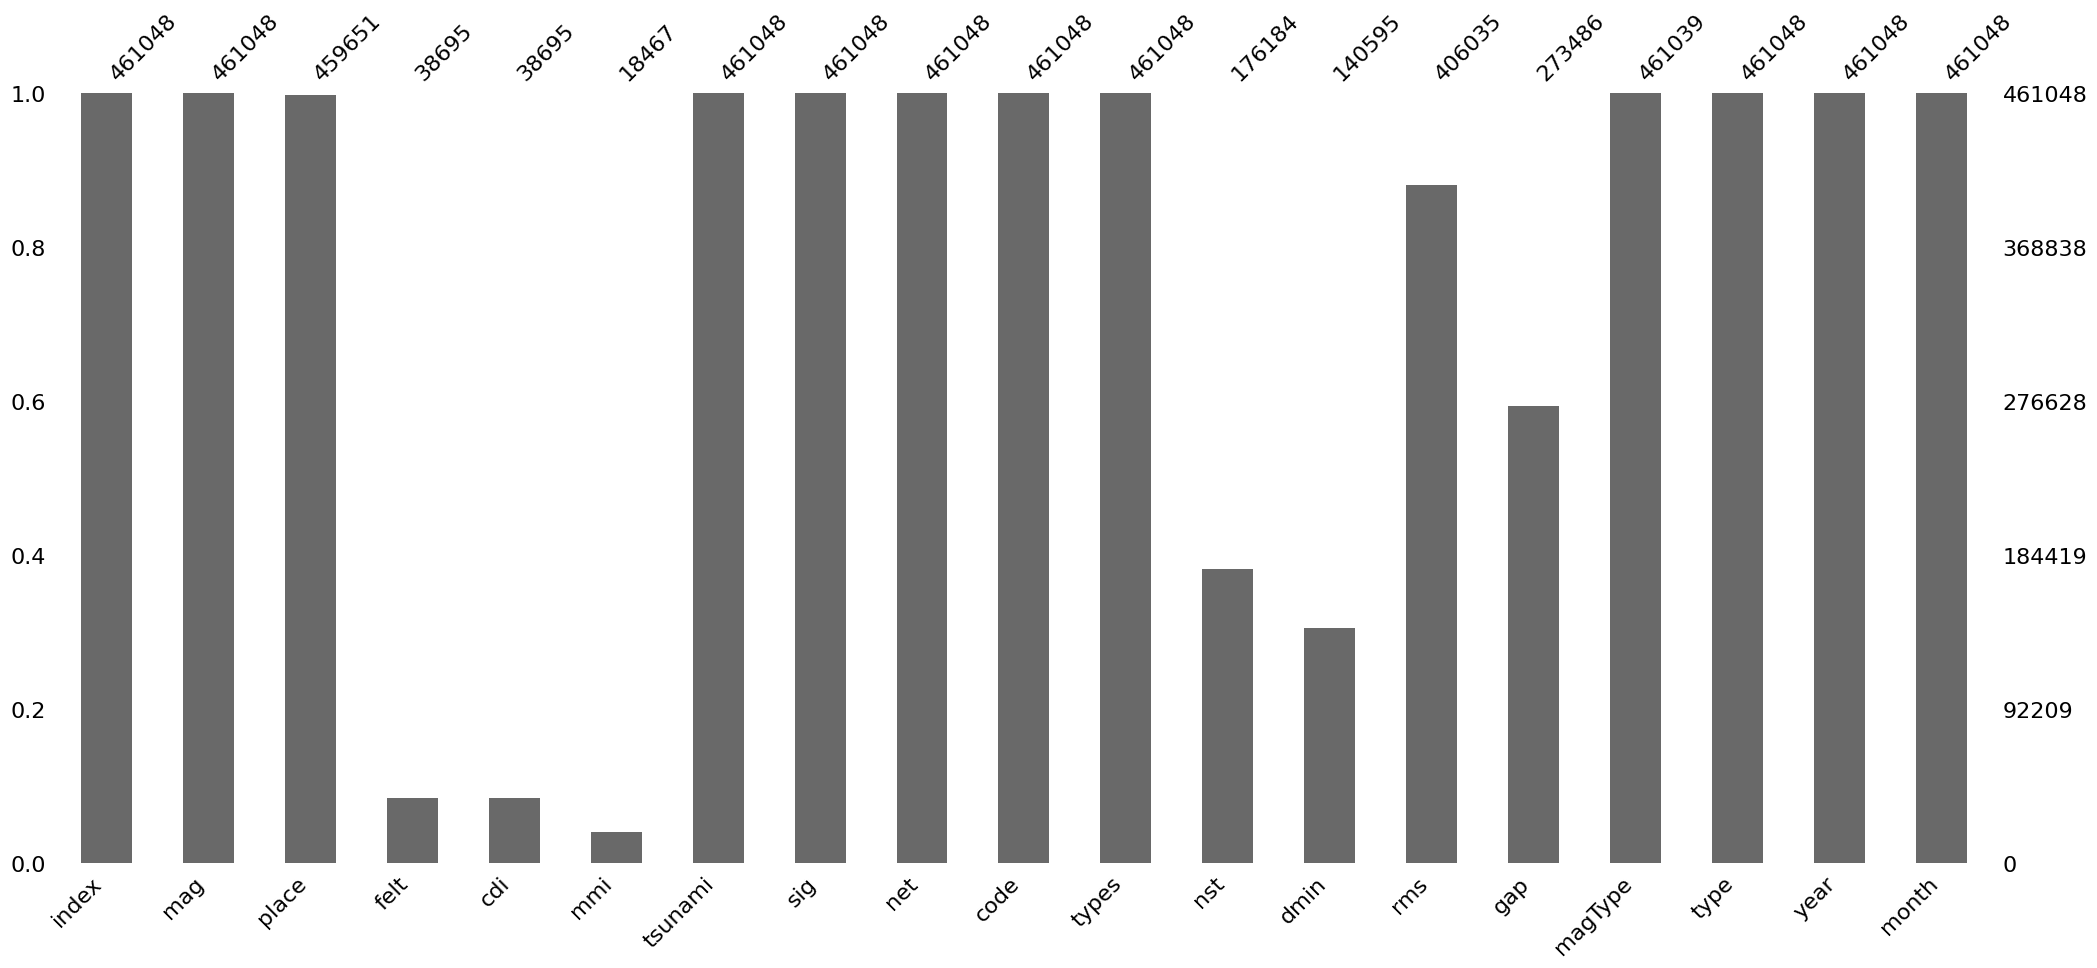

In [4]:
# Observemos los valores faltantes por columna
msno.bar(df_global)
# Se puede observar que hay columnas con demasiados valores faltantes

In [5]:
# Observamos si hay valores duplicados
df_global.duplicated().sum()

0

In [6]:
# Observamos los años con mas registros 
df_global["year"].value_counts().sort_values(ascending=False).head()

2014    16973
2021    16732
2011    15408
2005    15203
2022    15193
Name: year, dtype: int64

In [46]:
# Observamos el porcentaje de tsunamis en base al total (0 es negativo, 1 positivo)
df_global["tsunami"].value_counts(normalize=True) * 100

0    99.689403
1     0.310597
Name: tsunami, dtype: float64

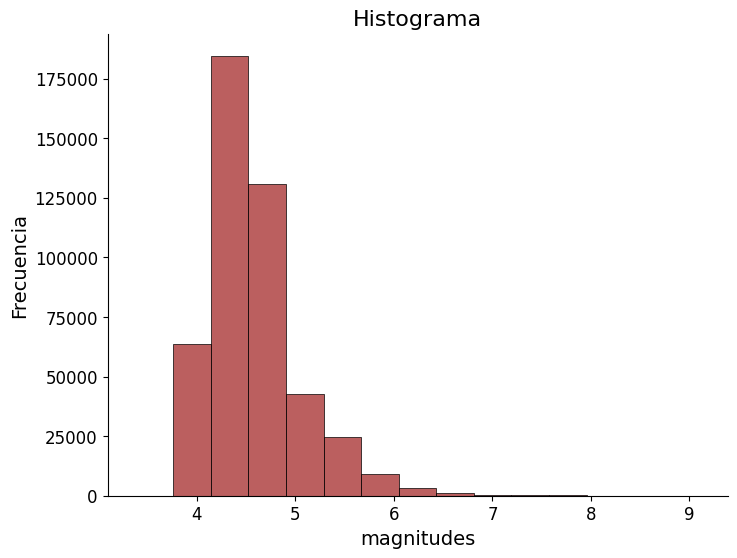

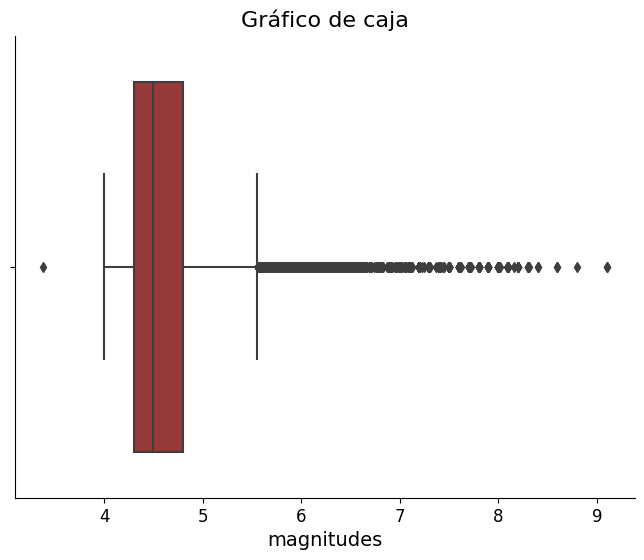

In [8]:
# Histograma de las magnitudes
plt.figure(figsize=(8,6))
sns.histplot(df_global["mag"] ,bins=15, edgecolor='black', linewidth=0.5, color = "brown")
plt.title("Histograma", fontsize=16)
plt.xlabel("magnitudes", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()

# Gráfico de caja de las magnitudes
plt.figure(figsize=(8,6))
sns.boxplot(x=df_global["mag"], color="brown")
plt.title("Gráfico de caja", fontsize=16)
plt.xlabel("magnitudes", fontsize=14)
plt.xticks(fontsize=12)

sns.despine()
plt.show()

# Se pueden observar numerosos valores atípicos, lo cual en este caso es normal

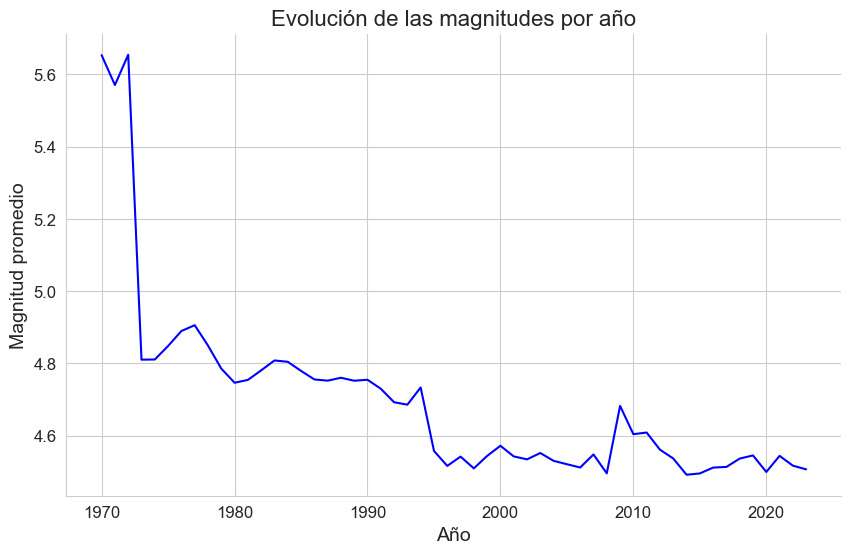

In [35]:
# Agrupamos los datos por año y calculamos la media de las magnitudes
df_grouped = df_global.groupby('year')['mag'].mean()

# Creamos el gráfico de líneas utilizando Seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, color='blue')

# Configuramos los ejes y la leyenda
plt.xlabel('Año', fontsize=14)
plt.ylabel('Magnitud promedio', fontsize=14)
plt.title('Evolución de las magnitudes por año', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()

# Podemos observar la evolución de las magnitudes en funcion del año

---

# USA

##### Observaremos los mismos datos anteriores, pero centrados en Estados Unidos

In [9]:
# Ingestamos el archivo json
df_usa = pd.read_json("Datasets/Usa_Jap_Mex/Usa.json")
# Observamos
df_usa

,idCountry,year,month,location,distance,types,code,mag,felt,cdi,mmi,tsunami,sig,net,nst,dmin,rms,gap,magType
0,1,1975,6,Alabama,3 km NNW of Fayette,",origin,shakemap,trump-shakemap,",p0000brg,4.50,NaN,NaN,5.447,0,312,us,NaN,NaN,NaN,NaN,mb
1,1,1997,10,Alabama,15 km NNW of Flomaton,",impact-text,origin,phase-data,shakemap,trump-...",p00089hq,4.80,NaN,NaN,6.012,0,354,us,NaN,NaN,0.98,NaN,mb
2,1,2003,4,Alabama,8 km S of Valley Head,",associate,dyfi,focal-mechanism,impact-text,lo...",605341,4.60,17204.0,6.0,4.987,0,926,se,21.0,NaN,0.07,154.0,mw
3,1,2004,11,Alabama,4 km W of Forkland,",associate,dyfi,impact-text,moment-tensor,orig...",p000d7vw,4.30,85.0,5.0,NaN,0,327,us,61.0,NaN,0.90,78.9,mwr
4,1,1970,1,Aleutian Islands,Rat Islands,",impact-text,origin,trump-origin,",800290,5.73,NaN,NaN,NaN,0,505,iscgem,NaN,NaN,NaN,NaN,mw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22351,1,2013,9,Wyoming,20 km W of Fort Washakie,",dyfi,losspager,moment-tensor,origin,phase-dat...",b000jx4l,4.80,116.0,4.3,3.570,0,404,us,NaN,0.37800,1.08,16.0,mwr
22352,1,2014,3,Wyoming,22 km S of Mammoth,",cap,dyfi,general-link,general-text,losspager,...",60061837,4.83,22.0,2.9,5.570,0,700,uu,35.0,0.04763,0.25,63.0,mw
22353,1,2016,2,Wyoming,23 km SE of Kelly,",cap,dyfi,impact-text,losspager,moment-tensor,...",10004t1f,4.00,153.0,3.4,4.370,0,298,us,NaN,0.19500,1.16,18.0,mwr
22354,1,2016,8,Wyoming,4 km ENE of Bondurant,",cap,dyfi,impact-text,losspager,moment-tensor,...",20006umx,4.80,578.0,3.9,4.640,0,580,us,NaN,0.37300,1.14,7.0,mwr


In [10]:
# Observamos en detalle
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22356 entries, 0 to 22355
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   idCountry  22356 non-null  int64  
 1   year       22356 non-null  int64  
 2   month      22356 non-null  int64  
 3   location   21054 non-null  object 
 4   distance   22356 non-null  object 
 5   types      22356 non-null  object 
 6   code       22356 non-null  object 
 7   mag        22356 non-null  float64
 8   felt       2659 non-null   float64
 9   cdi        2659 non-null   float64
 10  mmi        2719 non-null   float64
 11  tsunami    22356 non-null  int64  
 12  sig        22356 non-null  int64  
 13  net        22356 non-null  object 
 14  nst        7038 non-null   float64
 15  dmin       5808 non-null   float64
 16  rms        18513 non-null  float64
 17  gap        10069 non-null  float64
 18  magType    22354 non-null  object 
dtypes: float64(8), int64(5), object(6)
memory usag

In [11]:
# Observamos las variables numéricas
df_usa.describe()

,idCountry,year,month,mag,felt,cdi,mmi,tsunami,sig,nst,dmin,rms,gap
count,22356.0,22356.000000,22356.000000,22356.000000,2659.000000,2659.000000,2719.000000,22356.000000,22356.000000,7038.000000,5808.000000,18513.000000,10069.000000
mean,1.0,1999.487967,6.473430,4.512716,467.561113,3.071455,3.887884,0.035069,324.637950,78.947712,0.977332,0.783407,134.149752
std,0.0,14.711042,3.399115,0.479395,3647.503574,1.649557,1.532001,0.183958,96.249933,100.758224,1.324885,0.415886,64.481627
min,1.0,1970.000000,1.000000,3.380000,0.000000,0.000000,0.000000,0.000000,176.000000,0.000000,0.000000,-1.000000,0.000000
25%,1.0,1987.000000,4.000000,4.180000,1.000000,1.000000,2.955000,0.000000,271.000000,23.000000,0.149000,0.580000,81.100000
50%,1.0,2000.000000,6.000000,4.400000,5.000000,3.100000,3.920000,0.000000,298.000000,45.000000,0.597650,0.850000,134.600000
75%,1.0,2013.000000,9.000000,4.700000,80.000000,4.100000,4.730000,0.000000,354.000000,90.000000,1.387000,1.030000,179.000000
max,1.0,2023.000000,12.000000,8.200000,131619.000000,9.100000,9.296000,1.000000,1870.000000,885.000000,24.651000,17.050000,354.000000


In [17]:
# Observamos que Estado tiene mas terremotos
df_usa["location"].value_counts().head(15)

 Alaska              14854
 California           1823
 Aleutian Islands     1425
 Hawaii                630
 Oregon                604
 Washington            363
 Nevada                327
 Georgia               163
 Idaho                 153
 Montana                95
 Oklahoma               92
 Wyoming                84
 Utah                   62
 New Mexico             38
 Texas                  37
Name: location, dtype: int64

In [20]:
# Observamos la cantidad de registros por años
df_usa["year"].value_counts().sort_values(ascending = False).head(15)

1986    752
2018    739
1980    710
2020    698
1996    690
2016    665
2017    618
2003    594
2014    581
2015    579
2002    552
2021    550
2010    550
1992    485
2008    475
Name: year, dtype: int64

---

# Japón

##### Sigue manteniendo la misma estructura de datos anteriormente vista

In [28]:
# Ingestamos
df_japon = pd.read_json("Datasets/Usa_Jap_Mex/Japón.json")
# Observamos
df_japon

,idCountry,year,month,place,types,code,mag,felt,cdi,mmi,tsunami,sig,net,nst,dmin,rms,gap,magType
11,2,1970,1,"45 km SSW of Obihiro, Japan",",origin,shakemap,trump-shakemap,",800254,6.40,NaN,NaN,6.419,0,630,iscgem,NaN,NaN,NaN,NaN,mw
74,2,1970,2,"Volcano Islands, Japan region",",origin,",799066,5.53,NaN,NaN,NaN,0,470,iscgem,NaN,NaN,NaN,NaN,mw
101,2,1970,3,"67 km NE of Naze, Japan",",origin,",798599,5.54,NaN,NaN,NaN,0,472,iscgem,NaN,NaN,NaN,NaN,mw
119,2,1970,3,"101 km WSW of Kurio, Japan",",origin,",798320,5.70,NaN,NaN,NaN,0,500,iscgem,NaN,NaN,NaN,NaN,mw
121,2,1970,3,"4 km WSW of Takanosu, Japan",",origin,shakemap,",798303,5.70,NaN,NaN,3.951,0,500,iscgem,NaN,NaN,NaN,NaN,mw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461039,2,2023,5,"75 km ESE of Katsuren-haebaru, Japan",",origin,phase-data,",7000jxal,5.10,NaN,NaN,NaN,0,400,us,58.0,0.883,0.99,79.0,mww
461040,2,2023,5,"81 km SE of Taira, Japan",",origin,phase-data,",7000jxaj,5.00,NaN,NaN,NaN,0,385,us,44.0,0.845,0.95,78.0,mb
461041,2,2023,5,"79 km ESE of Katsuren-haebaru, Japan",",dyfi,internal-moment-tensor,internal-origin,l...",7000jxag,5.90,10.0,3.1,3.841,0,539,us,76.0,0.871,0.75,57.0,mww
461043,2,2023,5,"82 km ESE of Katsuren-haebaru, Japan",",dyfi,internal-moment-tensor,moment-tensor,ori...",7000jxaa,5.30,2.0,2.7,NaN,0,433,us,74.0,0.909,0.83,64.0,mww


In [31]:
df_japon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39841 entries, 11 to 461044
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   idCountry  39841 non-null  int64  
 1   year       39841 non-null  int64  
 2   month      39841 non-null  int64  
 3   place      39841 non-null  object 
 4   types      39841 non-null  object 
 5   code       39841 non-null  object 
 6   mag        39841 non-null  float64
 7   felt       3510 non-null   float64
 8   cdi        3510 non-null   float64
 9   mmi        954 non-null    float64
 10  tsunami    39841 non-null  int64  
 11  sig        39841 non-null  int64  
 12  net        39841 non-null  object 
 13  nst        17950 non-null  float64
 14  dmin       10278 non-null  float64
 15  rms        36538 non-null  float64
 16  gap        24855 non-null  float64
 17  magType    39841 non-null  object 
dtypes: float64(8), int64(5), object(5)
memory usage: 5.8+ MB


In [32]:
df_japon.describe()

,idCountry,year,month,mag,felt,cdi,mmi,tsunami,sig,nst,dmin,rms,gap
count,39841.0,39841.000000,39841.000000,39841.000000,3510.000000,3510.000000,954.000000,39841.000000,39841.000000,17950.000000,10278.000000,36538.000000,24855.000000
mean,2.0,2003.943300,6.328230,4.582358,19.115670,2.570513,4.505371,0.000502,326.866419,68.425738,1.977038,0.889955,114.031821
std,0.0,13.116885,3.417468,0.429150,109.825265,1.589478,1.447937,0.022400,71.330941,90.945229,1.540317,0.250568,39.387350
min,2.0,1970.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,246.000000,4.000000,0.028000,0.000000,8.000000
25%,2.0,1995.000000,3.000000,4.300000,0.000000,1.000000,3.836500,0.000000,284.000000,20.000000,1.021250,0.720000,90.000000
50%,2.0,2008.000000,6.000000,4.500000,2.000000,2.500000,4.298000,0.000000,312.000000,34.000000,1.725500,0.890000,120.000000
75%,2.0,2013.000000,9.000000,4.800000,10.000000,3.600000,5.319500,0.000000,354.000000,73.000000,2.560750,1.050000,135.500000
max,2.0,2023.000000,12.000000,9.100000,5680.000000,9.100000,9.115000,1.000000,2419.000000,929.000000,44.071000,1.940000,335.700000


In [29]:
# Observamos las ubicaciones donde mas terremotos hay
df_japon["place"].value_counts()

Bonin Islands, Japan region             3496
Izu Islands, Japan region               3395
Volcano Islands, Japan region           1819
off the east coast of Honshu, Japan      369
near the east coast of Honshu, Japan     197
                                        ... 
206 km S of Itoman, Japan                  1
89 km SE of Itoman, Japan                  1
66 km NE of Misawa, Japan                  1
200 km NW of Naze, Japan                   1
81 km SE of Taira, Japan                   1
Name: place, Length: 18008, dtype: int64

In [30]:
# Observamos los registros por año
df_japon["year"].value_counts().sort_values(ascending=False).head(15)

2011    5557
2012    1335
2022    1286
2016    1204
2014    1204
2010    1177
2015    1172
2000    1159
2021    1121
2004    1061
2005    1048
2008    1036
2013    1011
2018     959
2020     906
Name: year, dtype: int64

---

# México

In [47]:
# eda de mexico, si se animan a hacerlo lo pueden hacer :p
# Ingestamos el archivo
df_mex = pd.read_json("Datasets/Usa_Jap_Mex/México.json")
# Observamos
df_mex

,idCountry,Fecha,Hora,Distancia,Estado,Latitud,Longitud,Magnitud,Profundidad
0,3,1970-02-03,23:08:50,141 km al SUR de SAN MARCOS,GRO,15.524,-99.493,6.6,21.0
1,3,1970-04-29,08:01:34,62 km al SUROESTE de CD HIDALGO,CHIS,14.463,-92.683,7.3,44.0
2,3,1970-04-30,02:32:58,100 km al SUROESTE de MAPASTEPEC,CHIS,14.608,-93.260,6.5,22.0
3,3,1971-09-30,02:18:00,92 km al SUROESTE de PUEBLO YAQUI,SON,26.880,-110.800,6.5,14.0
4,3,1972-10-20,02:17:46,238 km al OESTE de CIHUATLAN,JAL,18.700,-106.756,6.6,10.0
...,...,...,...,...,...,...,...,...,...
42697,3,2023-05-08,20:30:27,9 km al SUROESTE de CD IXTEPEC,OAX,16.490,-95.140,4.0,2.1
42698,3,2023-05-08,22:24:25,17 km al SURESTE de SALINA CRUZ,OAX,16.080,-95.080,4.0,12.2
42699,3,2023-05-09,00:16:55,13 km al NOROESTE de RIO GRANDE,OAX,16.110,-97.500,4.2,8.9
42700,3,2023-05-09,03:56:09,8 km al OESTE de TEHUANTEPEC,OAX,16.340,-95.310,4.6,13.9


###### NOTA : les recomiendo que usen los archivos JSON de la carpeta Datasets/ , por ejemplo "Datasets/KPI 1/...." , que estan mas organizados por KPI y asi. 
###### Y gracias por su tiempo y ayuda <3

---

# KPI 1

# KPI 1. Aumentar la cantidad de pólizas contratadas de inmuebles

El objetivo de este KPI es aumentar la cantidad de pólizas contratadas en un 10% para viviendas que cumplan con la norma de resistencia sísmica, con respecto al año anterior que se encontraban por fuera del sistema de seguros.
Objetivo: aumentar la cantidad de pólizas contratadas 
Indicador: 10%
Plazo: anual
Meta: alcanzar el 10% en un año
Monitoreo: con las bases de datos que ofrecen las aseguradoras se analiza y se compara.
Relevante: porque está alineado con el objetivo 2 de Implementar mecanismos de comunicación y alerta a la comunidad civil en un lenguaje intuitivamente, pues si para adquirir la póliza se exige que la vivienda tenga el cumplimiento de construcciones contra sismos se va a minimizar los daños en los edificios y la seguridad mejorará y esto puede ser asequible por internet.
Para medir este KPI se requiere conocer la cantidad de pólizas adquiridas el año anterior y la cantidad de pólizas adquiridas el siguiente año.


In [31]:
# # KPI 1. Aumentar la cantidad de pólizas contratadas de inmuebles
# Para este KPI se encuentran datos de las polizas de los paises de Japon y Mexico
#Primero la tabla de Japon: muestra los porcentajes de penetración año por año en cada estado.
# Ingestamos el archivo json (incremento_polizas.json)
df_kpi1 = pd.read_json("Datasets/KPI 1/incremento_polizas.json")

# Observamos
df_kpi1.sample(3)

# existe información de los años 2015 al 2021 de los Estados de Japon

,%,2015,2016,2017,2018,2019,2020,2021,idCountry
4,Akita,68.5,69.5,70.8,72.0,73.3,74.4,74.8,2
39,Fukuoka,64.0,67.2,68.8,71.5,73.3,75.3,76.3,2
7,Ibaraki,60.5,61.9,62.2,63.8,64.6,66.0,66.5,2


---

In [32]:
# Observamos más en detalle
df_kpi1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 0 to 47
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   %          48 non-null     object 
 1   2015       48 non-null     float64
 2   2016       48 non-null     float64
 3   2017       48 non-null     float64
 4   2018       48 non-null     float64
 5   2019       48 non-null     float64
 6   2020       48 non-null     float64
 7   2021       48 non-null     float64
 8   idCountry  48 non-null     int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 3.8+ KB


In [ ]:
# Existen 47 prefectures o estados en Japon y se encuentran datos del año 2015 a 2021

In [33]:
# Observamos el comportamiento de las variables numéricas
df_kpi1.describe()


,2015,2016,2017,2018,2019,2020,2021,idCountry
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0
mean,61.527083,63.766667,64.958333,67.216667,68.868750,70.410417,71.279167,2.0
std,8.901368,8.507852,8.357538,7.850798,7.626721,7.471371,7.465551,0.0
min,39.200000,45.000000,47.500000,50.100000,52.000000,53.600000,54.400000,2.0
25%,55.575000,57.725000,59.000000,62.050000,63.925000,65.725000,66.325000,2.0
50%,61.300000,62.700000,63.600000,65.350000,66.900000,68.600000,69.850000,2.0
75%,65.850000,68.125000,69.375000,71.625000,73.350000,74.625000,75.625000,2.0
max,86.200000,86.400000,86.300000,86.800000,87.000000,87.500000,88.700000,2.0


In [ ]:
#Se observa que se tienen 48 registros no nulos, el promedio siempre ha estado superior a 61.5 y a crecido cada año
# la desviación estandar disminuye cada año pero al aumentar el promedio cada año implica que la industria de seguros de inmuebles
# en japon ha madurado con el tiempo y se ha vuelto mas estable y predecible. Es decir, a medida que la industria se ha desarrollado
#y ha establecido practicas y regulaciones mas estables y seguras, se ha reducido la variabilidad en la penetracion de ventas de
#ventas de polizas de inmuebles.

<AxesSubplot: >

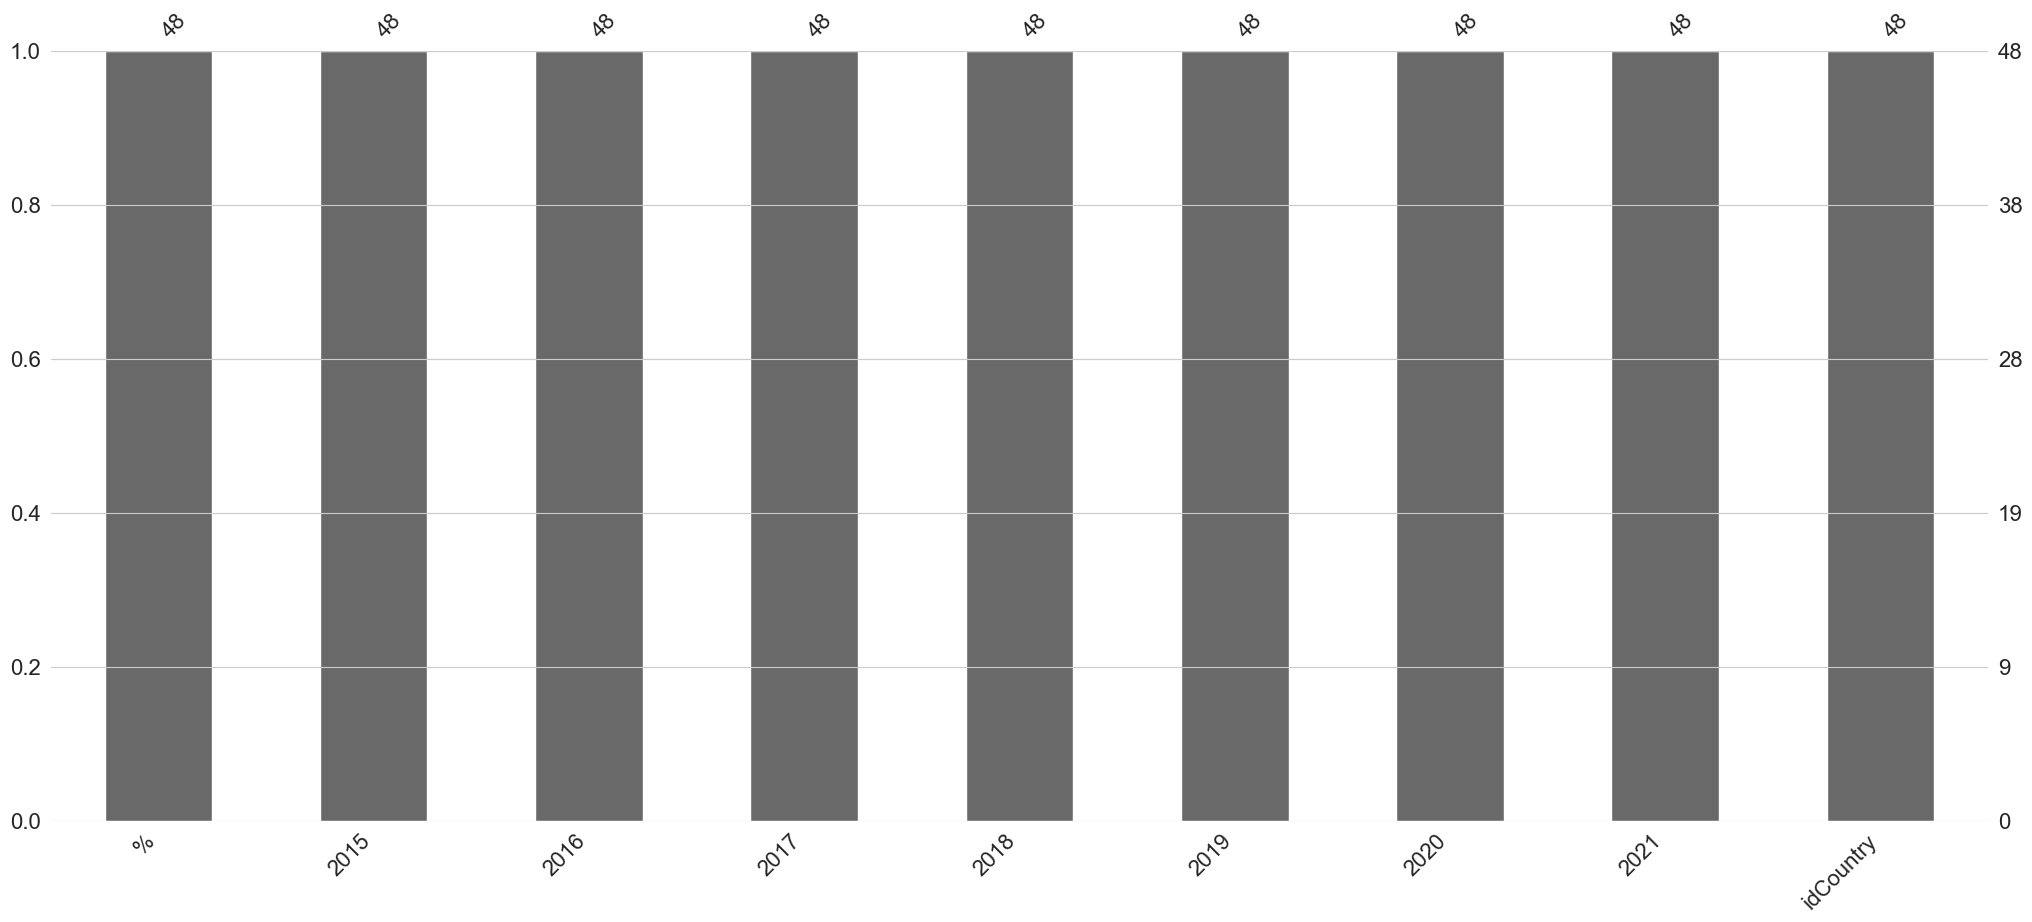

In [34]:
# Observemos los valores faltantes por columna
msno.bar(df_kpi1)
# la información esta completa, existen 48 registros incluye totales

In [35]:
# Observamos si hay valores duplicados
df_kpi1.duplicated().sum()
#no hay valores duplicados

0

In [41]:
df_kpi1 = df_kpi1.rename(columns={"%": "prefecture"})


In [42]:
# Observamos más en detalle
df_kpi1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 0 to 47
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   prefecture  48 non-null     object 
 1   2015        48 non-null     float64
 2   2016        48 non-null     float64
 3   2017        48 non-null     float64
 4   2018        48 non-null     float64
 5   2019        48 non-null     float64
 6   2020        48 non-null     float64
 7   2021        48 non-null     float64
 8   idCountry   48 non-null     int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 3.8+ KB


In [46]:
# Observamos las prefactures con mas valores mas altos

columns = ['2015', '2016', '2017', '2018', '2019', '2020', '2021']
penetracion_mas_alta = df_kpi1.set_index('prefecture')[columns].sum(axis=1).sort_values(ascending=False).head(5)
print(penetracion_mas_alta)


prefecture
Miyagi       608.9
Kochi        602.2
Miyazaki     567.9
Kagoshima    556.1
Kumamoto     547.7
dtype: float64


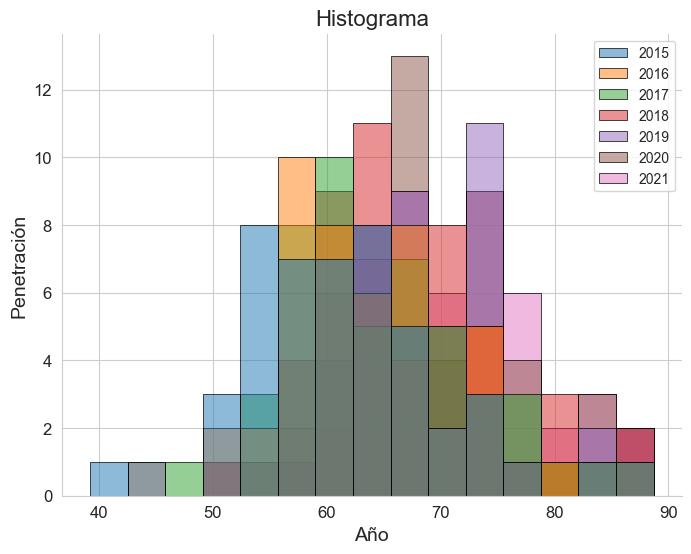

In [47]:
# Histograma de las magnitudes
plt.figure(figsize=(8,6))
sns.histplot(df_kpi1.set_index('prefecture')[columns],bins=15, edgecolor='black', linewidth=0.5, color = "brown")
plt.title("Histograma", fontsize=16)
plt.xlabel("Año", fontsize=14)
plt.ylabel("Penetración", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()

#se concluye que las penetraciones mas altas se dieron en el año 2021, pero realizare un analisis por año para verificar

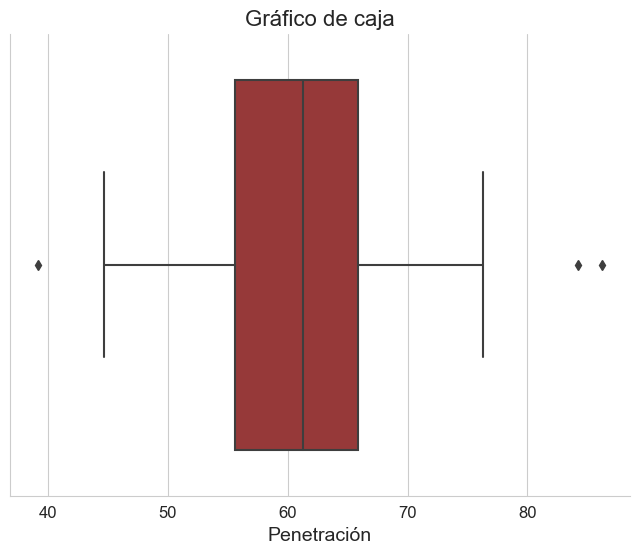

In [51]:
# Gráfico de caja de las magnitudes
plt.figure(figsize=(8,6))
sns.boxplot(x=df_kpi1['2015'], color="brown")
plt.title("Gráfico de caja 2015", fontsize=16)
plt.xlabel("Penetración", fontsize=14)
plt.xticks(fontsize=12)

sns.despine()
plt.show()


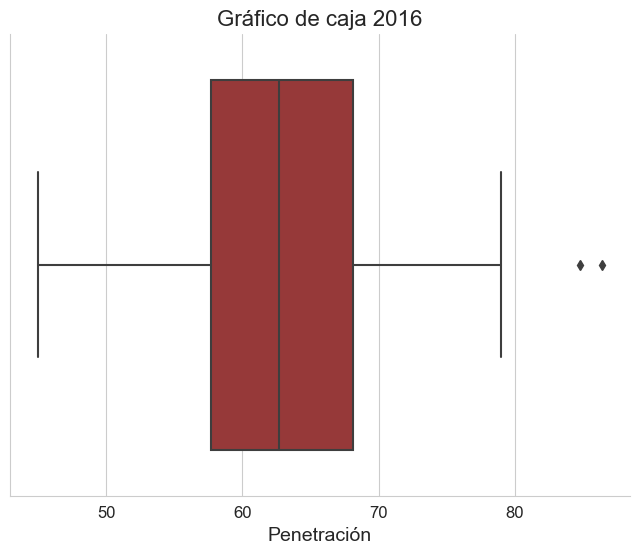

In [52]:
# Gráfico de caja de las magnitudes
plt.figure(figsize=(8,6))
sns.boxplot(x=df_kpi1['2016'], color="brown")
plt.title("Gráfico de caja 2016", fontsize=16)
plt.xlabel("Penetración", fontsize=14)
plt.xticks(fontsize=12)

sns.despine()
plt.show()

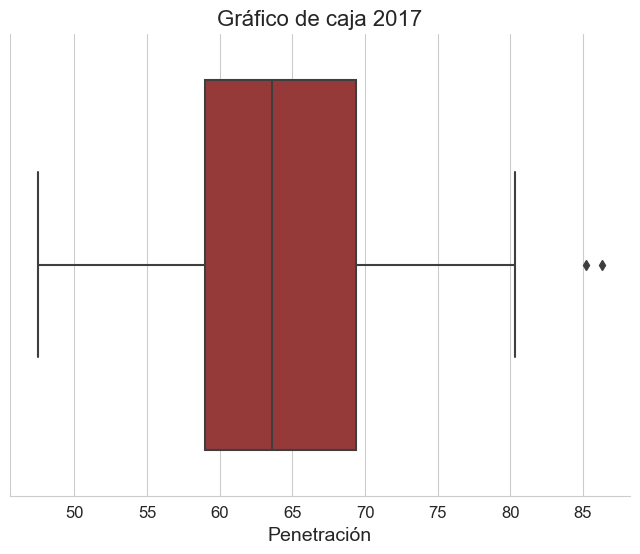

In [53]:
# Gráfico de caja de las magnitudes
plt.figure(figsize=(8,6))
sns.boxplot(x=df_kpi1['2017'], color="brown")
plt.title("Gráfico de caja 2017", fontsize=16)
plt.xlabel("Penetración", fontsize=14)
plt.xticks(fontsize=12)

sns.despine()
plt.show()

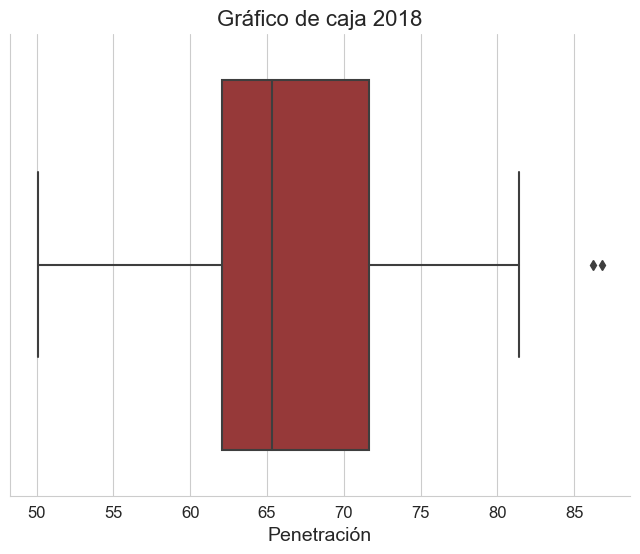

In [54]:
# Gráfico de caja de las magnitudes
plt.figure(figsize=(8,6))
sns.boxplot(x=df_kpi1['2018'], color="brown")
plt.title("Gráfico de caja 2018", fontsize=16)
plt.xlabel("Penetración", fontsize=14)
plt.xticks(fontsize=12)

sns.despine()
plt.show()

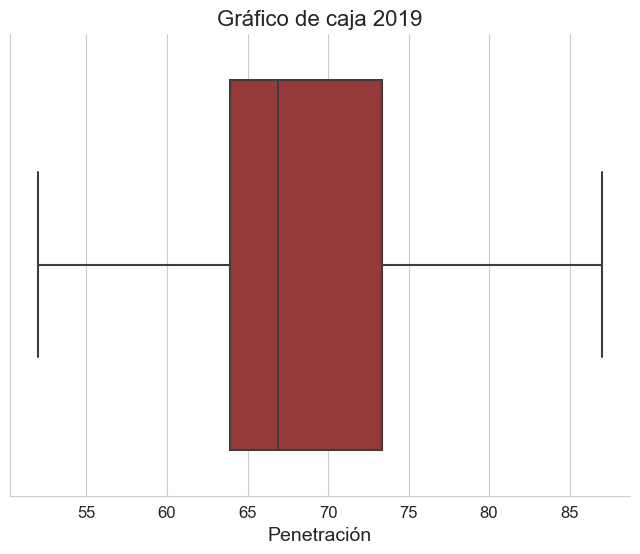

In [55]:
# Gráfico de caja de las magnitudes
plt.figure(figsize=(8,6))
sns.boxplot(x=df_kpi1['2019'], color="brown")
plt.title("Gráfico de caja 2019", fontsize=16)
plt.xlabel("Penetración", fontsize=14)
plt.xticks(fontsize=12)

sns.despine()
plt.show()

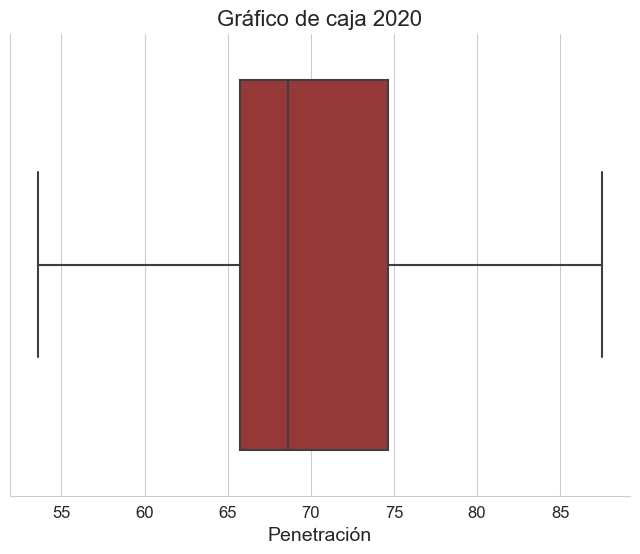

In [56]:
# Gráfico de caja de las magnitudes
plt.figure(figsize=(8,6))
sns.boxplot(x=df_kpi1['2020'], color="brown")
plt.title("Gráfico de caja 2020", fontsize=16)
plt.xlabel("Penetración", fontsize=14)
plt.xticks(fontsize=12)

sns.despine()
plt.show()

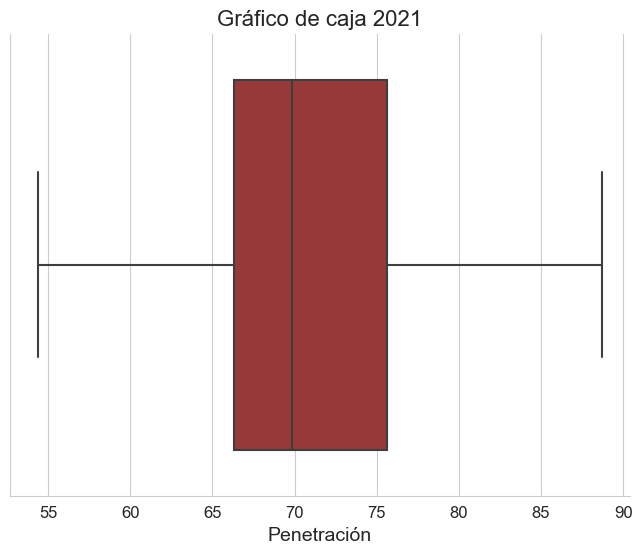

In [57]:
# Gráfico de caja de las magnitudes
plt.figure(figsize=(8,6))
sns.boxplot(x=df_kpi1['2021'], color="brown")
plt.title("Gráfico de caja 2021", fontsize=16)
plt.xlabel("Penetración", fontsize=14)
plt.xticks(fontsize=12)

sns.despine()
plt.show()

In [61]:
# Observamos más en detalle
df_kpi1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   prefecture   336 non-null    object 
 1   year         336 non-null    object 
 2   penetration  336 non-null    float64
dtypes: float64(1), object(2)
memory usage: 8.0+ KB


In [ ]:
# Primero, creamos una columna nueva con la información de penetración de cada prefectura para cada año
df_kpi1 = df_kpi1.melt(id_vars=['prefecture'], value_vars=['2015', '2016', '2017', '2018', '2019', '2020', '2021'], var_name='year', value_name='penetration')

In [62]:
df_kpi1['year'] = df_kpi1['year'].astype(int)


In [65]:

# Agrupamos los datos por año y calculamos la media de las % prefectures
df_yearly1 = df_kpi1.groupby('year')['penetration'].mean()
print(" Año y Penetración: ", df_yearly1)

%Penetración:  year
2015    61.527083
2016    63.766667
2017    64.958333
2018    67.216667
2019    68.868750
2020    70.410417
2021    71.279167
Name: penetration, dtype: float64


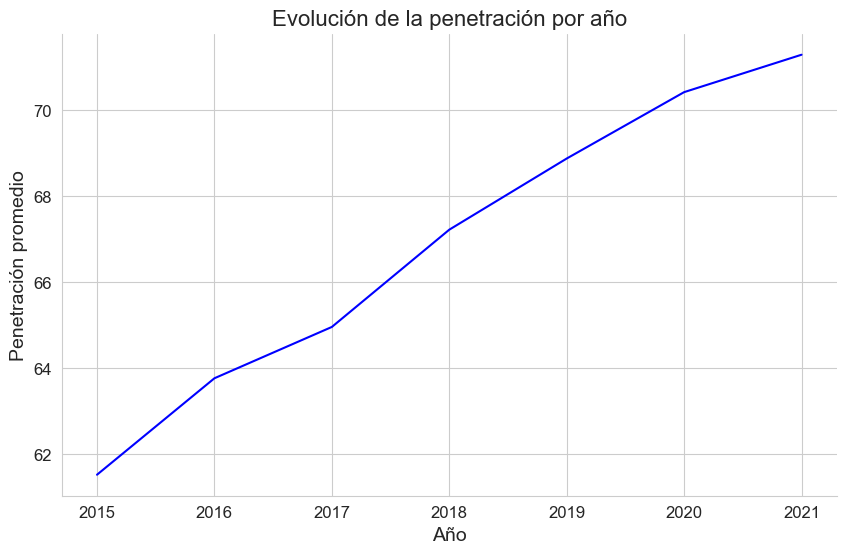

In [67]:
# Creamos el gráfico de líneas utilizando Seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_yearly1, color='blue')
# Configuramos los ejes y la leyenda
plt.xlabel('Año', fontsize=14)
plt.ylabel('Penetración promedio', fontsize=14)
plt.title('Evolución de la penetración por año', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()

# el crecimiento ha sido consistente al pasar los años, aunque bajo un poco del 2020, se ve una leve baja de la 
# inclinación que venia pero siguio creciendo al 2021.

In [3]:
# Ingestamos el archivo json (descientos seguros.json)
df_kpi1_des = pd.read_json("Datasets/KPI 1/descuentos seguros.json")

# Observamos
df_kpi1_des.sample(3)

# existe información de los años 2015 al 2021 de los Estados de Japon

,Tipo de descuento,Cantidad de polizas nuevas,Monto Asegurado nuevo en millones de Yen,Primas de seguros nuevo en miles de Yenes,Cantidad de polizas vigentes,Cantidad total de seguros contratados en millones de Yen,Año,idCountry
14,Descuento de Edificio con aislamiento Sismico,26326,266943,713309,63855,650640,2019,2
1,Descuento de Edificio con resistencia sismica ...,462712,6940240,20987222,1303605,19508456,2021,2
7,Descuento de Edificio con aislamiento Sismico,28413,295098,769327,70968,731817,2020,2


In [4]:
# Observamos más en detalle
df_kpi1_des.info()


<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 0 to 20
Data columns (total 8 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Tipo de descuento                                         21 non-null     object
 1   Cantidad de polizas nuevas                                21 non-null     int64 
 2   Monto Asegurado nuevo en millones de Yen                  21 non-null     int64 
 3   Primas de seguros nuevo en miles de Yenes                 21 non-null     int64 
 4   Cantidad de polizas vigentes                              21 non-null     int64 
 5   Cantidad total de seguros contratados en millones de Yen  21 non-null     int64 
 6   Año                                                       21 non-null     int64 
 7   idCountry                                                 21 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 1

In [5]:
# Observamos el comportamiento de las variables numéricas
df_kpi1_des.describe()


,Cantidad de polizas nuevas,Monto Asegurado nuevo en millones de Yen,Primas de seguros nuevo en miles de Yenes,Cantidad de polizas vigentes,Cantidad total de seguros contratados en millones de Yen,Año,idCountry
count,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,21.00000,21.0
mean,1.337434e+06,1.157396e+07,4.740653e+07,2.900016e+06,2.778776e+07,2020.00000,2.0
std,2.088693e+06,1.875203e+07,7.904772e+07,4.521618e+06,4.518621e+07,0.83666,0.0
min,1.046100e+04,9.557000e+04,6.180260e+05,2.491500e+04,2.596020e+05,2019.00000,2.0
25%,2.841300e+04,2.950980e+05,7.693270e+05,7.645700e+04,8.031650e+05,2019.00000,2.0
50%,1.036320e+05,8.484210e+05,3.942494e+06,2.764940e+05,2.191622e+06,2020.00000,2.0
75%,2.825627e+06,1.671133e+07,7.886616e+07,6.057790e+06,4.171819e+07,2021.00000,2.0
max,5.740396e+06,5.457303e+07,2.324906e+08,1.288489e+07,1.355914e+08,2021.00000,2.0


<AxesSubplot: >

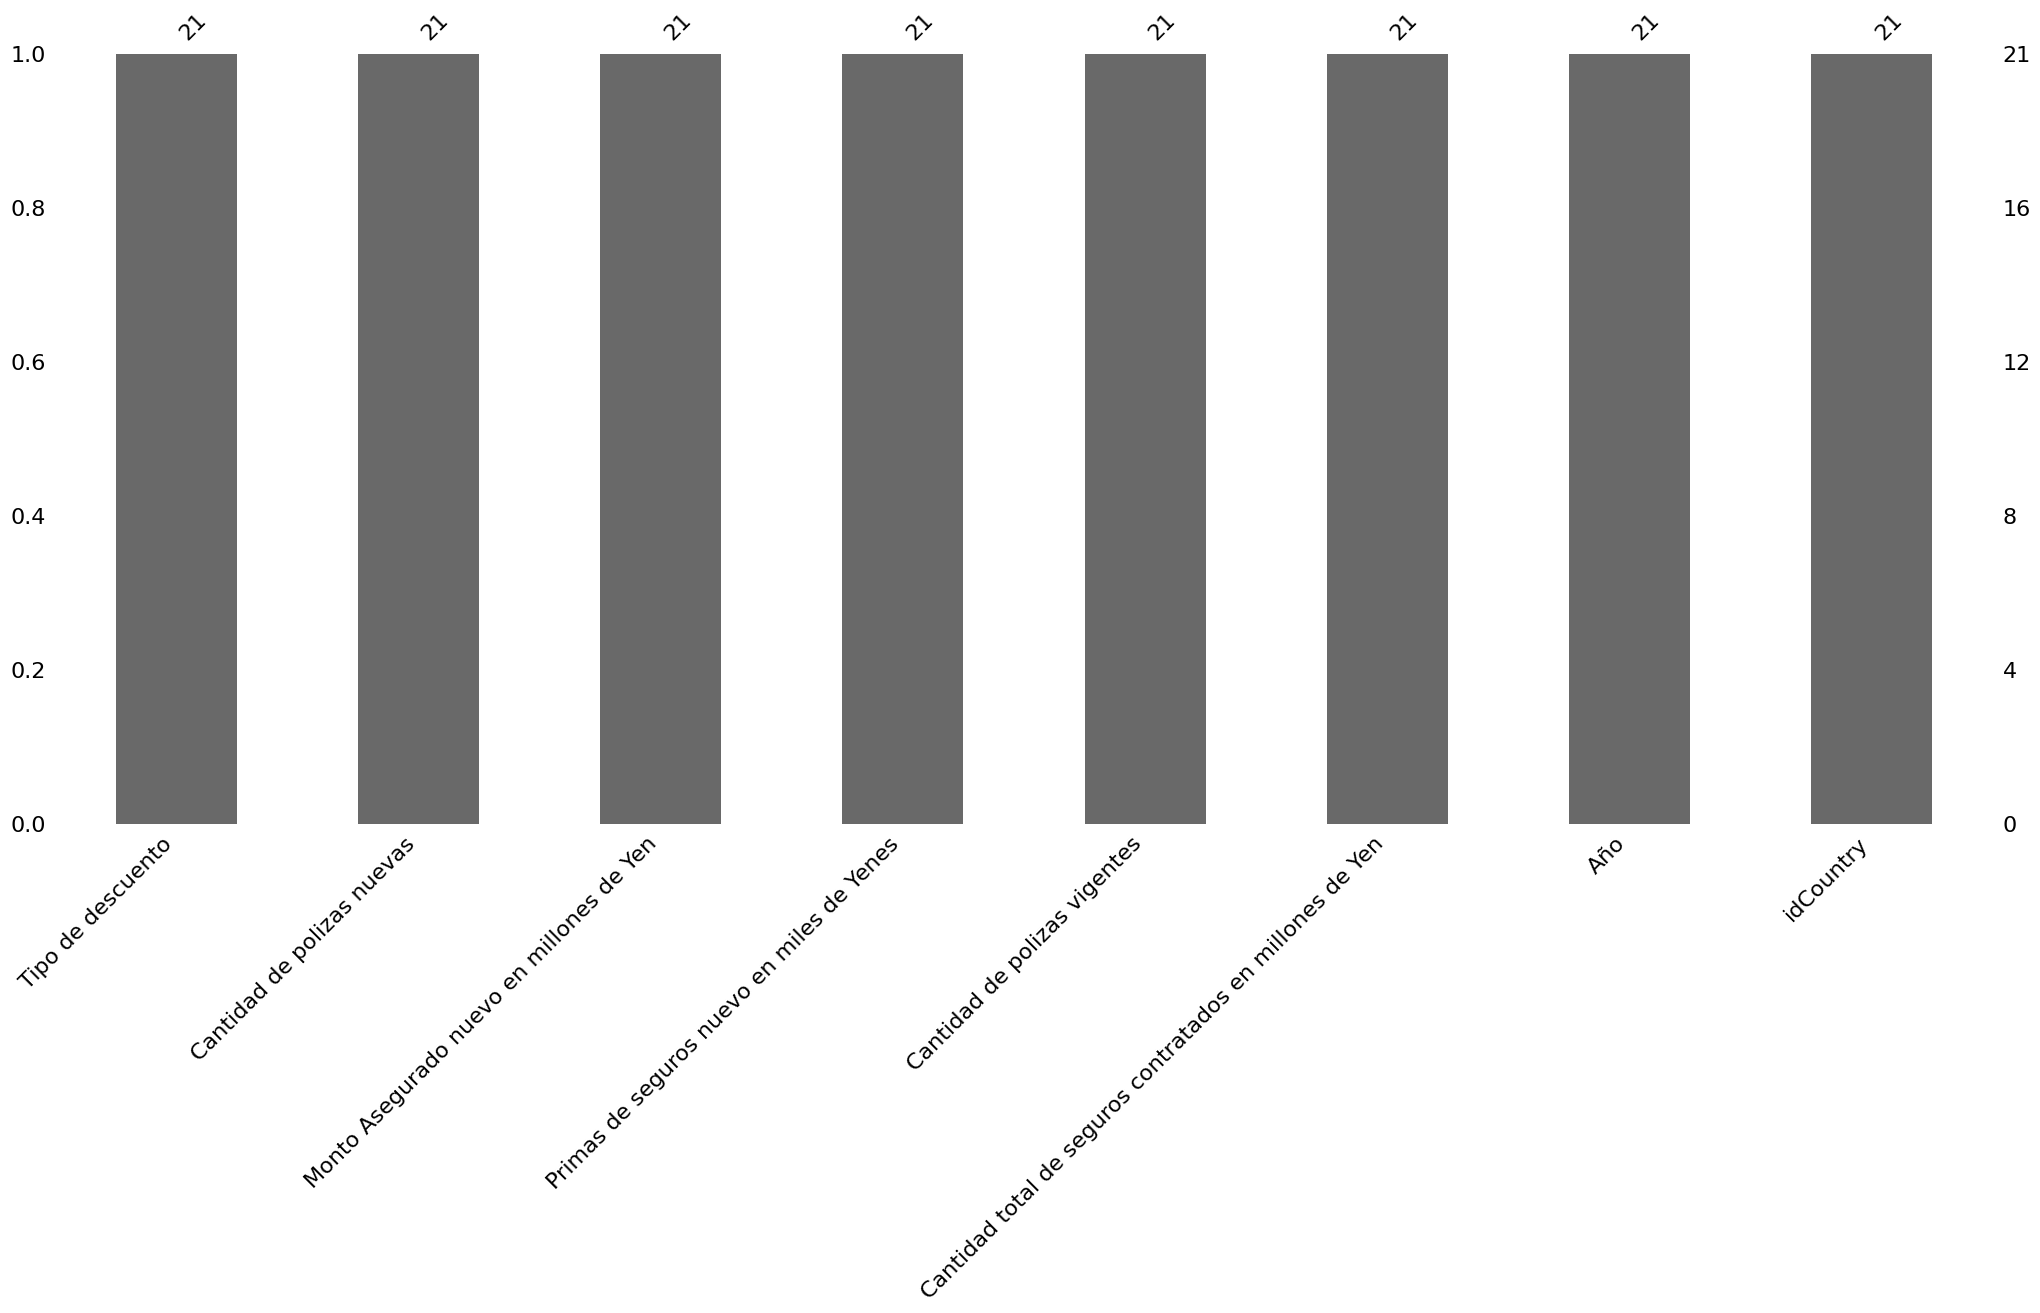

In [7]:
# Observemos los valores faltantes por columna
msno.bar(df_kpi1_des)
# Se puede observar que todas las columnas tienen todos los datos


In [8]:
# Observamos si hay valores duplicados
df_kpi1_des.duplicated().sum()


0

In [9]:
#renombramos algunas columnas
df_kpi1_des = df_kpi1_des.rename(columns={"Cantidad total de seguros contratados en millones de Yen": "Monto total en millones Yen"})
df_kpi1_des = df_kpi1_des.rename(columns={"Primas de seguros nuevo en miles de Yenes": "Primas nuevas millones Yen"})


In [30]:
#descuento mas alto en cual año

# agrupar por el tipo de descuento y sumar los montos en todos los años
descuentos = df_kpi1_des.groupby('Tipo de descuento').sum()

# encontrar el año y el monto más alto de cada tipo de descuento
descuentos['Año'] = descuentos.idxmax(axis=1)

# cambiar el nombre de la columna "Monto más alto" a "Monto"
descuentos = descuentos.rename(columns={'Monto total en millones Yen': 'Monto'})

# convertir la columna "Monto" a numérica
#descuentos['Monto'] = pd.to_numeric(descuentos['Monto'], errors='coerce')

# imprimir los resultados
print(descuentos[['Año', 'Monto']])



                                                                           Año   
Tipo de descuento                                                                
Descuento de Año de construcción de la propiedad    Primas nuevas millones Yen  \
Descuento de Edificio con aislamiento Sismico       Primas nuevas millones Yen   
Descuento de Edificio con resistencia sismica B...  Primas nuevas millones Yen   
Descuento de Edificio con resistencia sismica a...  Primas nuevas millones Yen   
Descuento de Edificio con resistencia sismica m...  Primas nuevas millones Yen   
Descuento de En diagnostico de resistencia sismica  Primas nuevas millones Yen   
Sin Descuento (sin reducción de precio)             Primas nuevas millones Yen   

                                                        Monto  
Tipo de descuento                                              
Descuento de Año de construcción de la propiedad    390263111  
Descuento de Edificio con aislamiento Sismico         2185622  
Descu

In [46]:
df_kpi1_des.info

<bound method DataFrame.info of                                     Tipo de descuento   
0       Descuento de Edificio con aislamiento Sismico  \
1   Descuento de Edificio con resistencia sismica ...   
2   Descuento de Edificio con resistencia sismica ...   
3   Descuento de Edificio con resistencia sismica ...   
4   Descuento de En diagnostico de resistencia sis...   
5    Descuento de Año de construcción de la propiedad   
6             Sin Descuento (sin reducción de precio)   
7       Descuento de Edificio con aislamiento Sismico   
8   Descuento de Edificio con resistencia sismica ...   
9   Descuento de Edificio con resistencia sismica ...   
10  Descuento de Edificio con resistencia sismica ...   
11  Descuento de En diagnostico de resistencia sis...   
12   Descuento de Año de construcción de la propiedad   
13            Sin Descuento (sin reducción de precio)   
14      Descuento de Edificio con aislamiento Sismico   
15  Descuento de Edificio con resistencia sismica ...   

In [48]:
# Agrupamos los datos por año y calculamos la media de las primas
df_grouped_des = df_kpi1_des.groupby('Año')['Primas nuevas millones Yen'].mean()
print(df_grouped_des)
# la media crecio mucho mas del 2019 al 2020 y aunque crecio en 2021 no crecio con la misma intensidad que el 2019 al 2020

Año
2019    4.547773e+07
2020    4.804473e+07
2021    4.869712e+07
Name: Primas nuevas millones Yen, dtype: float64


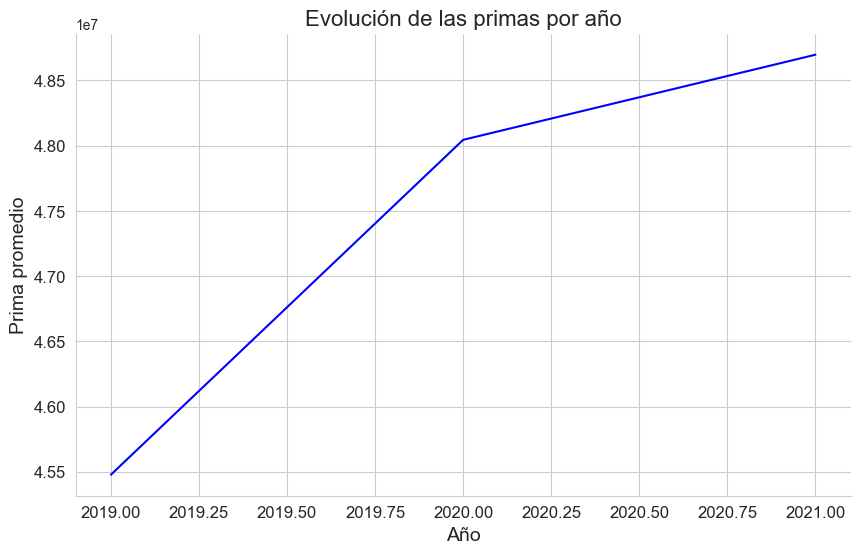

In [49]:
# Creamos el gráfico de líneas utilizando Seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped_des, color='blue')
# Configuramos los ejes y la leyenda
plt.xlabel('Año', fontsize=14)
plt.ylabel('Prima promedio', fontsize=14)
plt.title('Evolución de las primas por año', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()


In [55]:
# Analizamos el archivo de monto asegurado
# Ingestamos el archivo json
df_kpi1_monto = pd.read_json("Datasets/KPI 1/monto asegurado.json")
# Observamos
df_kpi1_monto.sample(3)


,Año Fiscal,Cantidad de polizas emitidas,Valor Total de montos asegurados,idCountry
3,2018,19005841,176604126,2
6,2021,20804068,202415533,2
2,2017,18257927,167054068,2


In [56]:
# Observamos más en detalle
df_kpi1_monto.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Año Fiscal                        7 non-null      int64
 1   Cantidad de polizas emitidas      7 non-null      int64
 2   Valor Total de montos asegurados  7 non-null      int64
 3   idCountry                         7 non-null      int64
dtypes: int64(4)
memory usage: 280.0 bytes


In [57]:
# Observamos el comportamiento de las variables numéricas
df_kpi1_monto.describe()


,Año Fiscal,Cantidad de polizas emitidas,Valor Total de montos asegurados,idCountry
count,7.000000,7.000000e+00,7.000000e+00,7.0
mean,2018.000000,1.897405e+07,1.767289e+08,2.0
std,2.160247,1.418998e+06,1.901017e+07,0.0
min,2015.000000,1.694142e+07,1.502729e+08,2.0
25%,2016.500000,1.798536e+07,1.633413e+08,2.0
50%,2018.000000,1.900584e+07,1.766041e+08,2.0
75%,2019.500000,2.004813e+07,1.905637e+08,2.0
max,2021.000000,2.080407e+07,2.024155e+08,2.0


<AxesSubplot: >

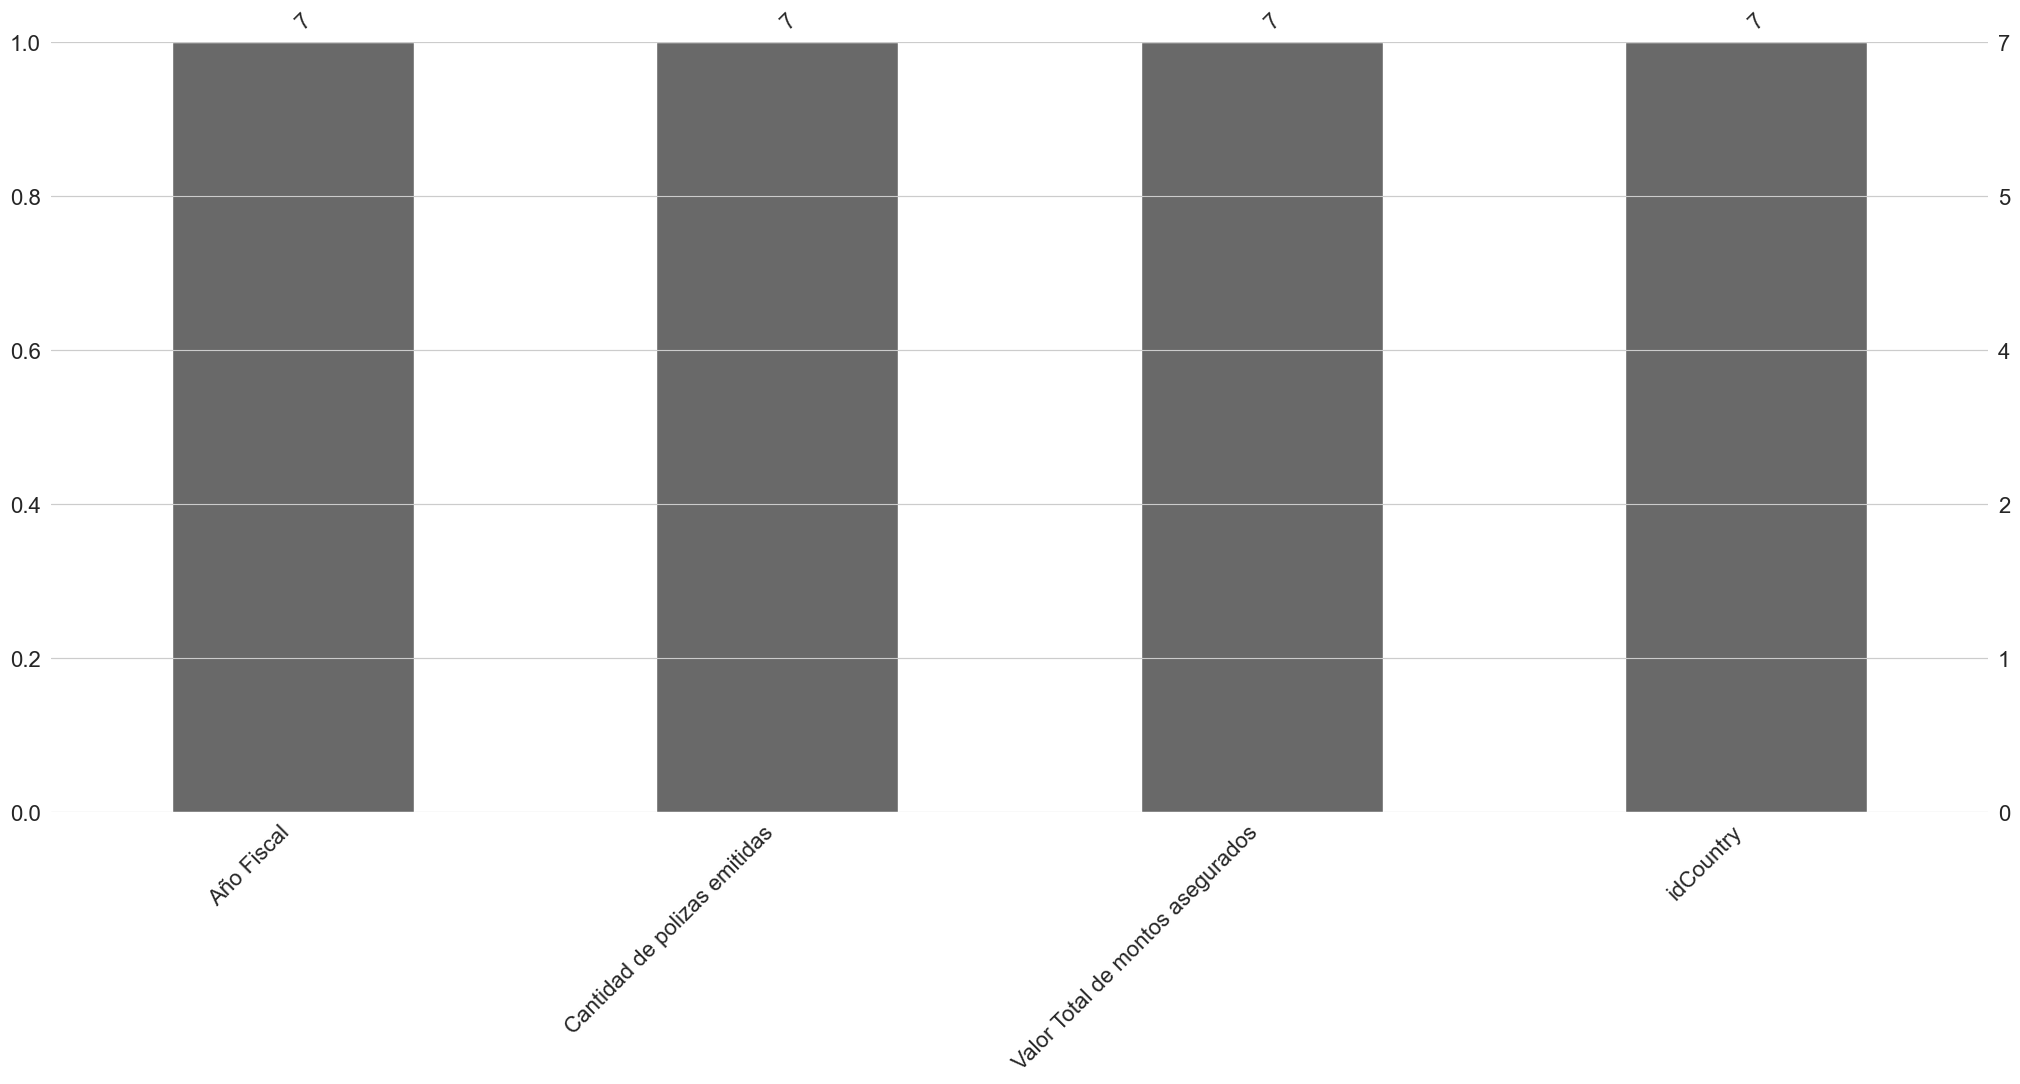

In [58]:
# Observemos los valores faltantes por columna
msno.bar(df_kpi1_monto)


In [59]:
# estan completos todos los datos

# Observamos si hay valores duplicados
df_kpi1_monto.duplicated().sum()


0

In [60]:
# No hay duplicados

# Agrupar por año y sumar las cantidades de pólizas emitidas
polizas_por_anio = df_kpi1_monto.groupby('Año Fiscal')['Cantidad de polizas emitidas'].sum()

# Obtener el año con más cantidad de pólizas emitidas
anio_max_polizas = polizas_por_anio.idxmax()

print("El año con más cantidad de pólizas emitidas es:", anio_max_polizas)



El año con más cantidad de pólizas emitidas es: 2021


In [63]:
# Agrupar por año y sumar las cantidades de pólizas emitidas
monto_por_anio = df_kpi1_monto.groupby('Año Fiscal')['Valor Total de montos asegurados'].sum()

# Obtener el año con más cantidad de pólizas emitidas
anio_max_monto = monto_por_anio.idxmax()

print("El año con más monto en pólizas es:", anio_max_monto)

El año con más monto en pólizas es: 2021


In [67]:
# Agrupamos los datos por año y calculamos la media de las magnitudes
df_grouped_monto = df_kpi1_monto.groupby('Año Fiscal')['Valor Total de montos asegurados'].mean()
print(df_grouped_monto)


Año Fiscal
2015    150272904.0
2016    159628458.0
2017    167054068.0
2018    176604126.0
2019    186105521.0
2020    195021847.0
2021    202415533.0
Name: Valor Total de montos asegurados, dtype: float64


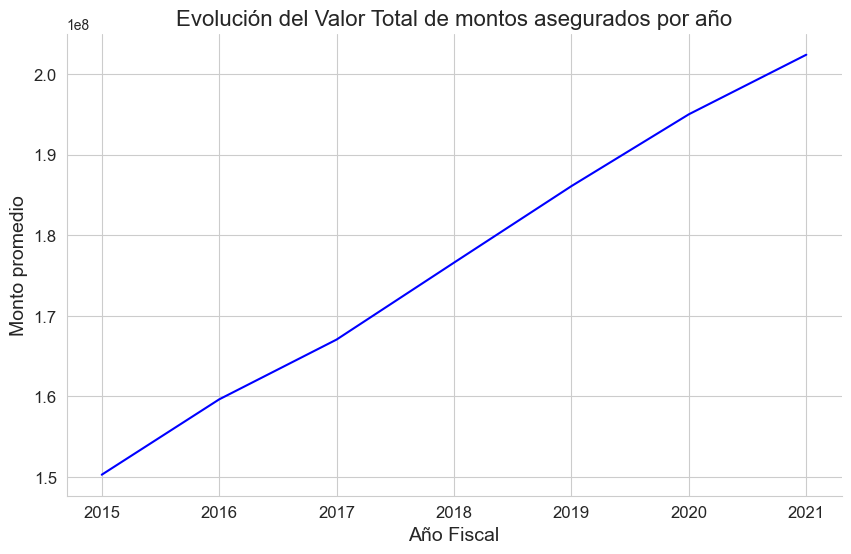

In [68]:
#Se observa que el monto asegurado ha crecido con los años

# Creamos el gráfico de líneas utilizando Seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped_monto, color='blue')
# Configuramos los ejes y la leyenda
plt.xlabel('Año Fiscal', fontsize=14)
plt.ylabel('Monto promedio', fontsize=14)
plt.title('Evolución del Valor Total de montos asegurados por año', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()


In [ ]:
# se observa un crecimiento constante

In [69]:
# Analizamos el archivo de nuevas polizas
# Ingestamos el archivo json
df_kpi1_nuevas = pd.read_json("Datasets/KPI 1/nuevas polizas.json")
# Observamos
df_kpi1_nuevas.sample(3)

,Año,Numero de polizas en vigencia,Suma Asegurada,Primas de Polizas pagadas en miles de yenes,idCountry
1,2016,9298612,77478280,254208714,2
3,2018,9308162,79432981,297305589,2
0,2015,9501454,79535689,245480878,2


In [70]:
# Observamos más en detalle
df_kpi1_nuevas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   Año                                          7 non-null      int64
 1   Numero de polizas en vigencia                7 non-null      int64
 2   Suma Asegurada                               7 non-null      int64
 3   Primas de Polizas pagadas en miles de yenes  7 non-null      int64
 4   idCountry                                    7 non-null      int64
dtypes: int64(5)
memory usage: 336.0 bytes


In [71]:
# Observamos el comportamiento de las variables numéricas
df_kpi1_nuevas.describe()

,Año,Numero de polizas en vigencia,Suma Asegurada,Primas de Polizas pagadas en miles de yenes,idCountry
count,7.000000,7.000000e+00,7.000000e+00,7.000000e+00,7.0
mean,2018.000000,9.305175e+06,7.915305e+07,2.934067e+08,2.0
std,2.160247,2.456344e+05,2.931130e+06,3.998954e+07,0.0
min,2015.000000,8.941885e+06,7.457131e+07,2.454809e+08,2.0
25%,2016.500000,9.156849e+06,7.756315e+07,2.577618e+08,2.0
50%,2018.000000,9.308162e+06,7.943298e+07,2.973056e+08,2.0
75%,2019.500000,9.506245e+06,8.102931e+07,3.273286e+08,2.0
max,2021.000000,9.559989e+06,8.288212e+07,3.408798e+08,2.0


<AxesSubplot: >

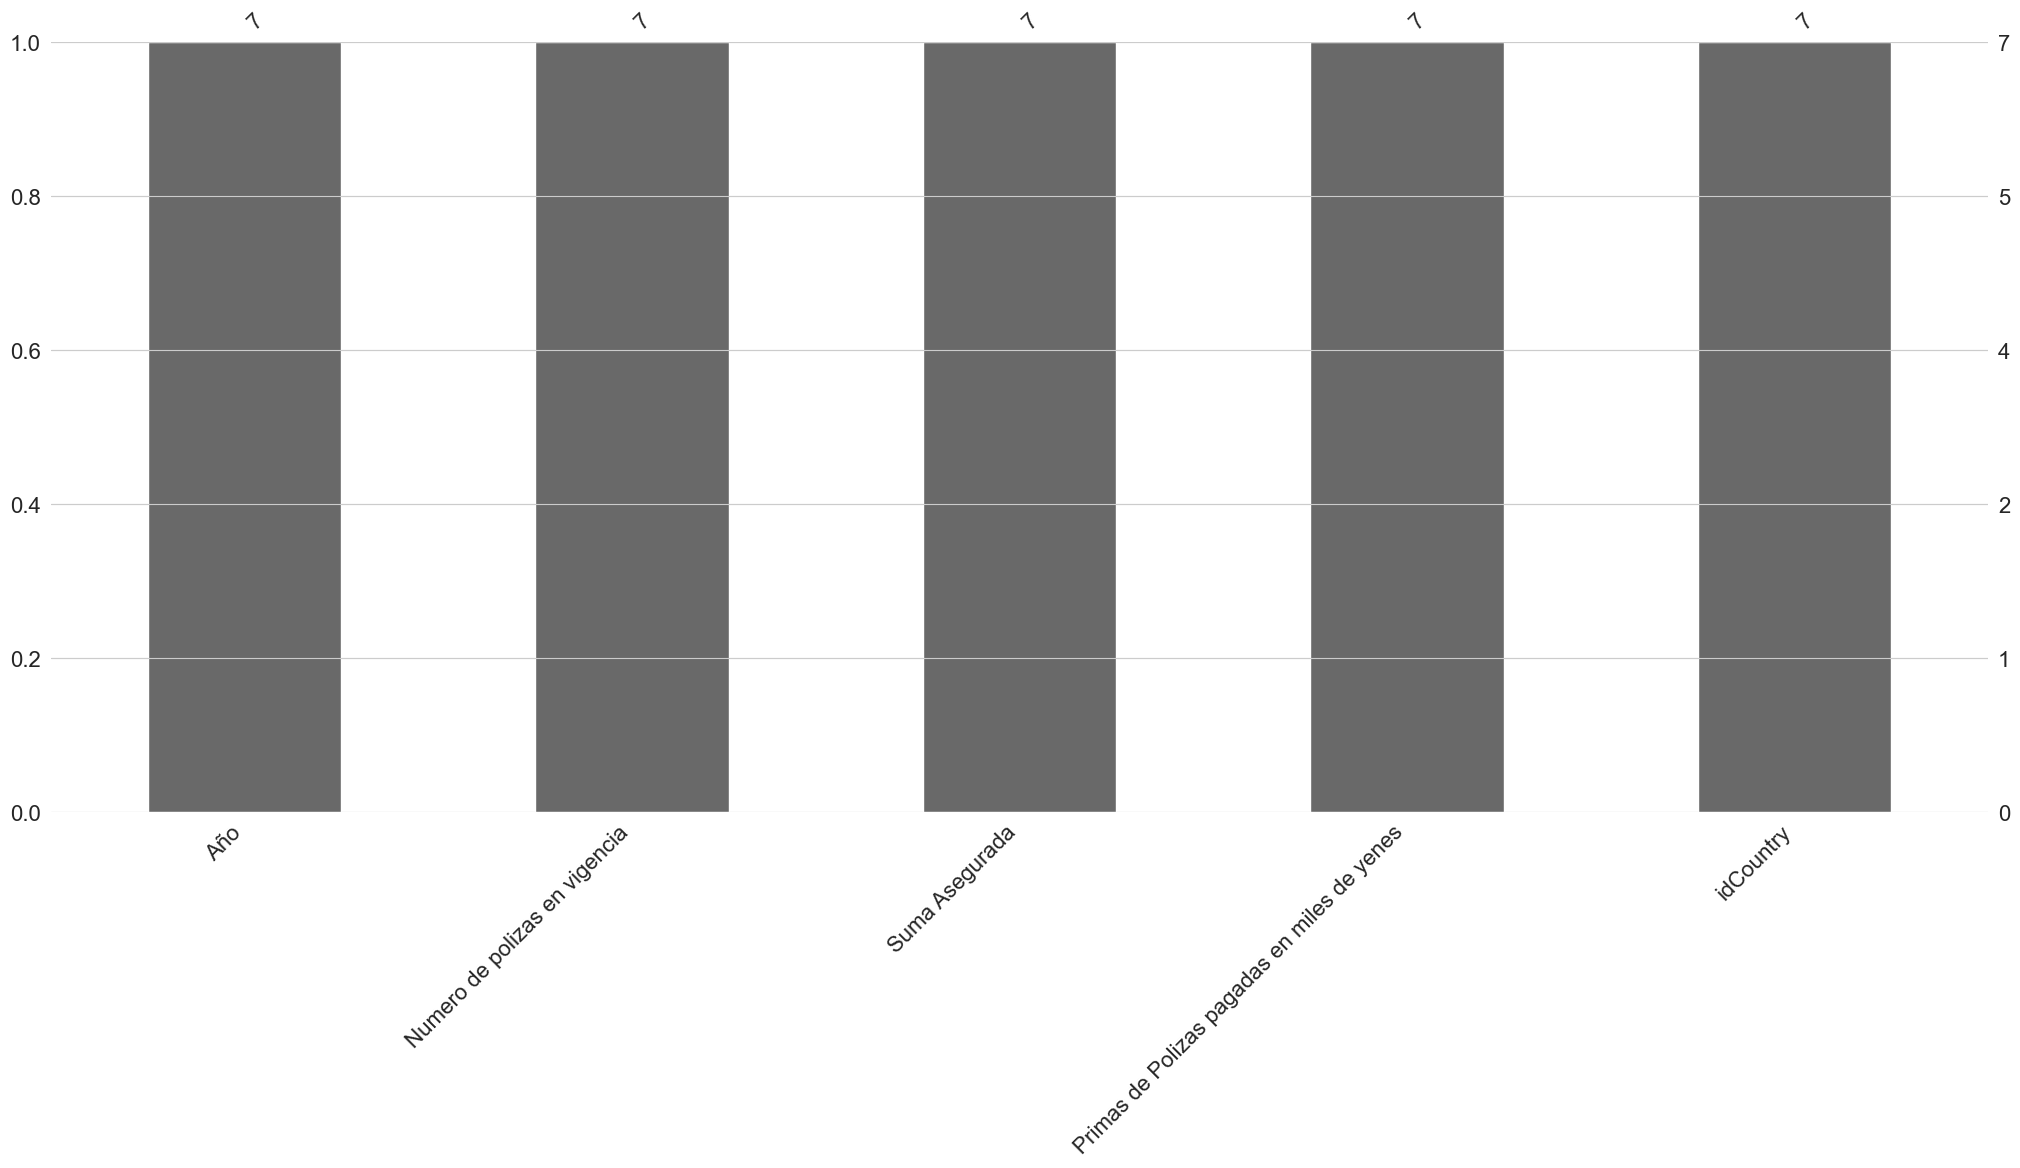

In [72]:
# Observemos los valores faltantes por columna
msno.bar(df_kpi1_nuevas)


In [73]:
# se encuentran todos los datos no hay vacios

# Observamos si hay valores duplicados
df_kpi1_nuevas.duplicated().sum()

0

In [75]:
# No hay duplicados

# Agrupar por año y sumar las cantidades de pólizas vigentes
polizas_por_anio = df_kpi1_nuevas.groupby('Año')['Numero de polizas en vigencia'].sum()

# Obtener el año con más cantidad de pólizas vigentes
anio_max_polizas_new = polizas_por_anio.idxmax()

print("El año con más cantidad de pólizas vigentes es:", anio_max_polizas_new)

El año con más cantidad de pólizas vigentes es: 2020


In [79]:
# Agrupar por año y sumar las sumas aseguradas
polizas_por_anio = df_kpi1_nuevas.groupby('Año')['Suma Asegurada'].sum()

# Obtener el año con mayor valor asegurado
anio_max_polizas_aseg = polizas_por_anio.idxmax()

print("El año con mayor valor asegurado es:", anio_max_polizas_aseg)

El año con mayor valor asegurado es: 2020


In [81]:
# Agrupamos los datos por año y calculamos la media de las Suma Asegurada
df_grouped_suma = df_kpi1_nuevas.groupby('Año')['Suma Asegurada'].mean()
print(df_grouped_suma)


Año
2015    79535689.0
2016    77478280.0
2017    74571308.0
2018    79432981.0
2019    82522929.0
2020    82882120.0
2021    77648023.0
Name: Suma Asegurada, dtype: float64


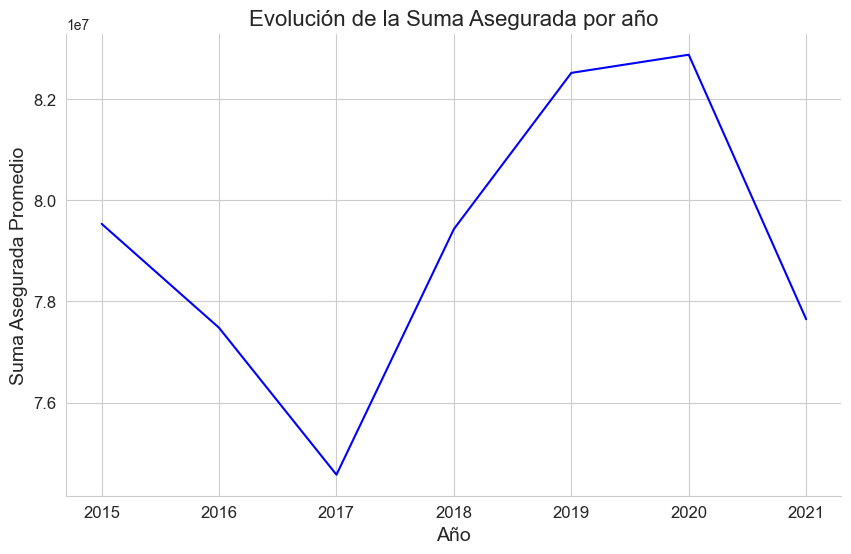

In [83]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_kpi1_nuevas, x='Año', y='Suma Asegurada', color='blue')
# Configuramos los ejes y la leyenda
plt.xlabel('Año', fontsize=14)
plt.ylabel('Suma Asegurada Promedio', fontsize=14)
plt.title('Evolución de la Suma Asegurada por año', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()


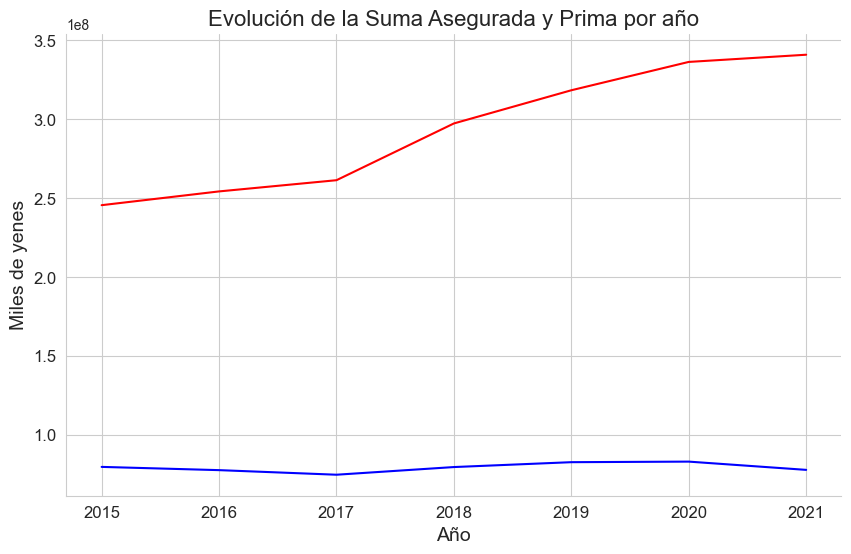

In [84]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_kpi1_nuevas, x='Año', y='Suma Asegurada', color='blue')
sns.lineplot(data=df_kpi1_nuevas, x='Año', y='Primas de Polizas pagadas en miles de yenes', color='red')
plt.xlabel('Año', fontsize=14)
plt.ylabel('Miles de yenes', fontsize=14)
plt.title('Evolución de la Suma Asegurada y Prima por año', fontsize=16)
plt.xticks(df_kpi1_nuevas['Año'], fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()


In [85]:
# Analizamos el archivo de polizas en vigencia
# Ingestamos el archivo json
df_kpi1_vigente = pd.read_json("Datasets/KPI 1/polizas_en_vigencia.json")
# Observamos
df_kpi1_vigente.sample(3)

,Año,Numero de polizas en vigencia,Suma Asegurada,Primas de Polizas pagadas en miles de yenes,idCountry
5,2020,9559989,82882120,336313105,2
2,2017,8941885,74571308,261314984,2
1,2016,9298612,77478280,254208714,2


In [86]:
# Observamos más en detalle
df_kpi1_vigente.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   Año                                          7 non-null      int64
 1   Numero de polizas en vigencia                7 non-null      int64
 2   Suma Asegurada                               7 non-null      int64
 3   Primas de Polizas pagadas en miles de yenes  7 non-null      int64
 4   idCountry                                    7 non-null      int64
dtypes: int64(5)
memory usage: 336.0 bytes


In [87]:
# Observamos el comportamiento de las variables numéricas
df_kpi1_vigente.describe()

,Año,Numero de polizas en vigencia,Suma Asegurada,Primas de Polizas pagadas en miles de yenes,idCountry
count,7.000000,7.000000e+00,7.000000e+00,7.000000e+00,7.0
mean,2018.000000,9.305175e+06,7.915305e+07,2.934067e+08,2.0
std,2.160247,2.456344e+05,2.931130e+06,3.998954e+07,0.0
min,2015.000000,8.941885e+06,7.457131e+07,2.454809e+08,2.0
25%,2016.500000,9.156849e+06,7.756315e+07,2.577618e+08,2.0
50%,2018.000000,9.308162e+06,7.943298e+07,2.973056e+08,2.0
75%,2019.500000,9.506245e+06,8.102931e+07,3.273286e+08,2.0
max,2021.000000,9.559989e+06,8.288212e+07,3.408798e+08,2.0


In [88]:
# Comparamos los DataFrames
if df_kpi1_nuevas.equals(df_kpi1_vigente):
    print('Los DataFrames son iguales')
else:
    print('Los DataFrames son diferentes')

Los DataFrames son iguales


In [89]:
# Analizamos el archivo de polizas japon
# Ingestamos el archivo json
df_kpi1_pjapon = pd.read_json("Datasets/KPI 1/polizas_japon.json")
# Observamos
df_kpi1_pjapon.sample(3)

,nombre Estado,Propiedades aseguradas,Monto asegurado,Primas emitidas,Propiedades Aseguradas,Monto asegurado.1,Tipo Construcción,año,idCountry
557,Saga,9842,22582,84153,30363,73471,Tipo B residencias,2021,2
449,Osaka,230476,1829703,8017508,508045,4090103,Tipo B edificios,2021,2
247,Tokyo,277036,2398893,19462936,596121,5294714,Tipo B edificios,2020,2


In [90]:
# Observamos más en detalle
df_kpi1_pjapon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 564 entries, 0 to 563
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   nombre Estado           564 non-null    object
 1   Propiedades aseguradas  564 non-null    int64 
 2   Monto asegurado         564 non-null    int64 
 3   Primas emitidas         564 non-null    int64 
 4   Propiedades Aseguradas  564 non-null    int64 
 5   Monto asegurado.1       564 non-null    int64 
 6   Tipo Construcción       564 non-null    object
 7   año                     564 non-null    int64 
 8   idCountry               564 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 44.1+ KB


In [91]:
df_kpi1_pjapon = df_kpi1_pjapon.rename(columns={'Monto asegurado': 'Monto asegurado nuevo', 'Monto asegurado.1': 'Monto asegurado vigente', 'Propiedades Aseguradas': 'Propiedades Aseguradas vigentes','Propiedades aseguradas': 'Propiedades Aseguradas nuevas' })


In [92]:
# Observamos el comportamiento de las variables numéricas
df_kpi1_pjapon.describe()

,Propiedades Aseguradas nuevas,Monto asegurado nuevo,Primas emitidas,Propiedades Aseguradas vigentes,Monto asegurado vigente,año,idCountry
count,564.000000,5.640000e+02,5.640000e+02,5.640000e+02,5.640000e+02,564.000000,564.0
mean,63936.384752,4.309452e+05,1.765137e+06,1.430639e+05,1.034651e+06,2020.000000,2.0
std,88647.635787,7.501202e+05,4.144271e+06,1.919866e+05,1.830170e+06,0.817221,0.0
min,701.000000,1.182000e+03,5.747000e+03,1.422000e+03,2.398000e+03,2019.000000,2.0
25%,16556.500000,5.913375e+04,1.472885e+05,3.989850e+04,1.296620e+05,2019.000000,2.0
50%,30481.000000,1.880915e+05,5.643715e+05,7.336250e+04,4.539360e+05,2020.000000,2.0
75%,65628.750000,4.213142e+05,1.429344e+06,1.545130e+05,1.042434e+06,2021.000000,2.0
max,630735.000000,6.780757e+06,4.048992e+07,1.406701e+06,1.724243e+07,2021.000000,2.0


<AxesSubplot: >

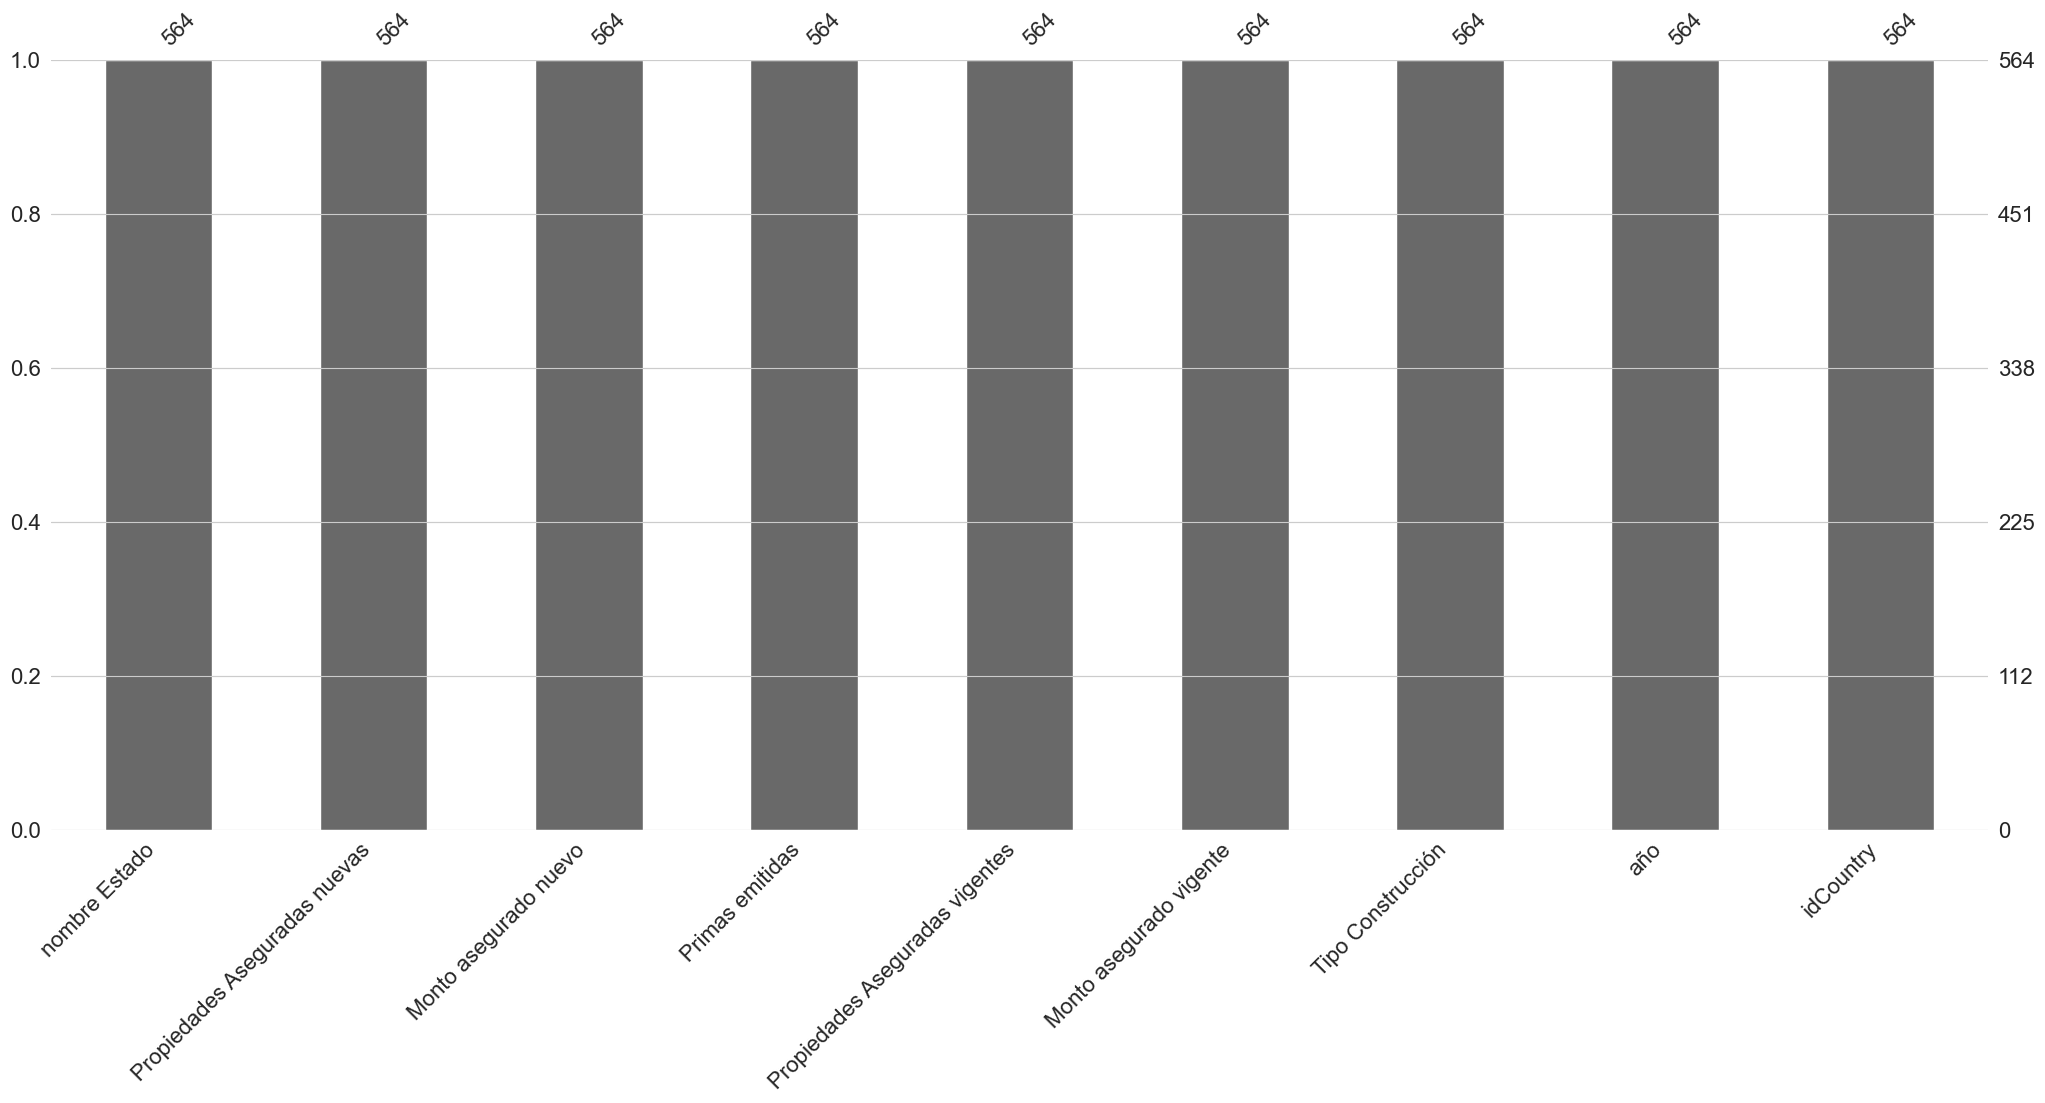

In [93]:
# Observemos los valores faltantes por columna
msno.bar(df_kpi1_pjapon)


In [94]:
# la información esta completa

# Observamos si hay valores duplicados
df_kpi1_pjapon.duplicated().sum()

0

In [97]:
# Agrupamos los datos por año y calculamos la media de las Suma Asegurada
df_grouped_suma_new = df_kpi1_pjapon.groupby('año')['Monto asegurado nuevo'].mean()
print(df_grouped_suma_new)

año
2019    438951.734043
2020    440862.351064
2021    413021.414894
Name: Monto asegurado nuevo, dtype: float64


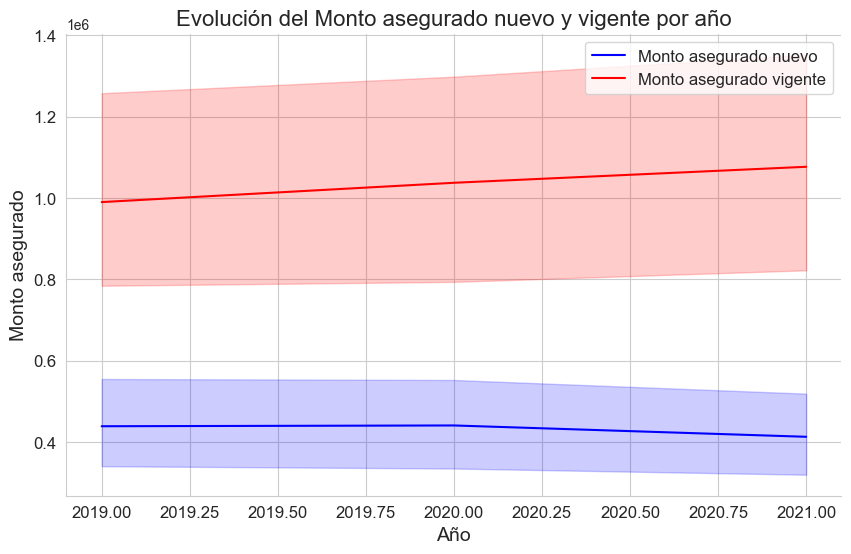

In [100]:
#se hace un grafico de lineas que permita visualizar el monto asegurado nuevo vs el monto asegurado vigente por año
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_kpi1_pjapon, x='año', y='Monto asegurado nuevo', color='blue', label='Monto asegurado nuevo')
sns.lineplot(data=df_kpi1_pjapon, x='año', y='Monto asegurado vigente', color='red', label='Monto asegurado vigente')
# Configuramos los ejes y la leyenda
plt.xlabel('Año', fontsize=14)
plt.ylabel('Monto asegurado', fontsize=14)
plt.title('Evolución del Monto asegurado nuevo y vigente por año', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
sns.despine()
plt.show()


In [103]:
# se puede observar que los montos asegurados por año vigentes crece mientras que los montos nuevos se ha disminuido del 2020 al 2021

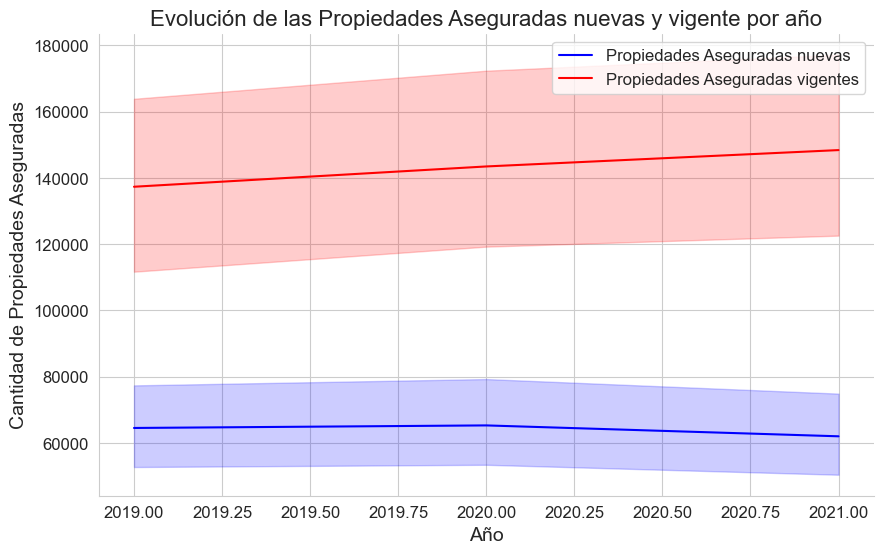

In [102]:
#se hace un grafico de lineas que permita visualizar la cantidad de propiedades vigentes y nuevas por año
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_kpi1_pjapon, x='año', y='Propiedades Aseguradas nuevas', color='blue', label='Propiedades Aseguradas nuevas')
sns.lineplot(data=df_kpi1_pjapon, x='año', y='Propiedades Aseguradas vigentes', color='red', label='Propiedades Aseguradas vigentes')
# Configuramos los ejes y la leyenda
plt.xlabel('Año', fontsize=14)
plt.ylabel('Cantidad de Propiedades Aseguradas', fontsize=14)
plt.title('Evolución de las Propiedades Aseguradas nuevas y vigente por año', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
sns.despine()
plt.show()

In [104]:
# se puede observar que la cantidad de polizas vigentes por año ha crecido mientras que las polizas nuevas se ha disminuido del 2020 al 2021

In [105]:
# Analizamos el archivo de seguro contra terremotos
# Ingestamos el archivo json
df_kpi1_terrem = pd.read_json("Datasets/KPI 1/seguro contra terremotos.json")
# Observamos
df_kpi1_terrem.sample(3)

,Prefectura,Cantidad de contratos,Monto asegurado,Prima del seguro,Cantidad de Polizas en vigor,Monto asegurado.1,Año,idCountry
93,Okinawa,53571,490187,1359502,117838,1260854,2020,2
76,Wakayama,64898,588298,2454169,138767,1312716,2020,2
60,Kanagawa,770317,6578053,43428737,1651711,15293676,2020,2


In [106]:
# Observamos más en detalle
df_kpi1_terrem.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141 entries, 0 to 140
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Prefectura                    141 non-null    object
 1   Cantidad de contratos         141 non-null    int64 
 2   Monto asegurado               141 non-null    int64 
 3   Prima del seguro              141 non-null    int64 
 4   Cantidad de Polizas en vigor  141 non-null    int64 
 5   Monto asegurado.1             141 non-null    int64 
 6   Año                           141 non-null    int64 
 7   idCountry                     141 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 9.9+ KB


In [107]:
df_kpi1_terrem = df_kpi1_terrem.rename(columns={'Monto asegurado': 'Monto asegurado nuevo', 'Monto asegurado.1': 'Monto asegurado vigente', ' Cantidad de contratos': ' Cantidad de polizas nuevas','Cantidad de Polizas en vigor': 'Cantidad de Polizas vigentes' })

In [108]:
# Observamos el comportamiento de las variables numéricas
df_kpi1_terrem.describe()

,Cantidad de contratos,Monto asegurado nuevo,Prima del seguro,Cantidad de Polizas vigentes,Monto asegurado vigente,Año,idCountry
count,1.410000e+02,1.410000e+02,1.410000e+02,1.410000e+02,1.410000e+02,141.000000,141.0
mean,1.991923e+05,1.723781e+06,7.060546e+06,4.319172e+05,4.138602e+06,2020.000000,2.0
std,2.545747e+05,2.110029e+06,1.255507e+07,5.353807e+05,4.977266e+06,0.819407,0.0
min,2.422800e+04,2.193810e+05,5.446210e+05,5.708300e+04,5.804570e+05,2019.000000,2.0
25%,5.645800e+04,5.170750e+05,1.482648e+06,1.314970e+05,1.305205e+06,2019.000000,2.0
50%,9.880000e+04,9.128120e+05,2.307702e+06,2.203780e+05,2.160687e+06,2020.000000,2.0
75%,2.008110e+05,1.776097e+06,6.572343e+06,4.435090e+05,4.363734e+06,2021.000000,2.0
max,1.328141e+06,1.109859e+07,7.231263e+07,2.795687e+06,2.670004e+07,2021.000000,2.0


<AxesSubplot: >

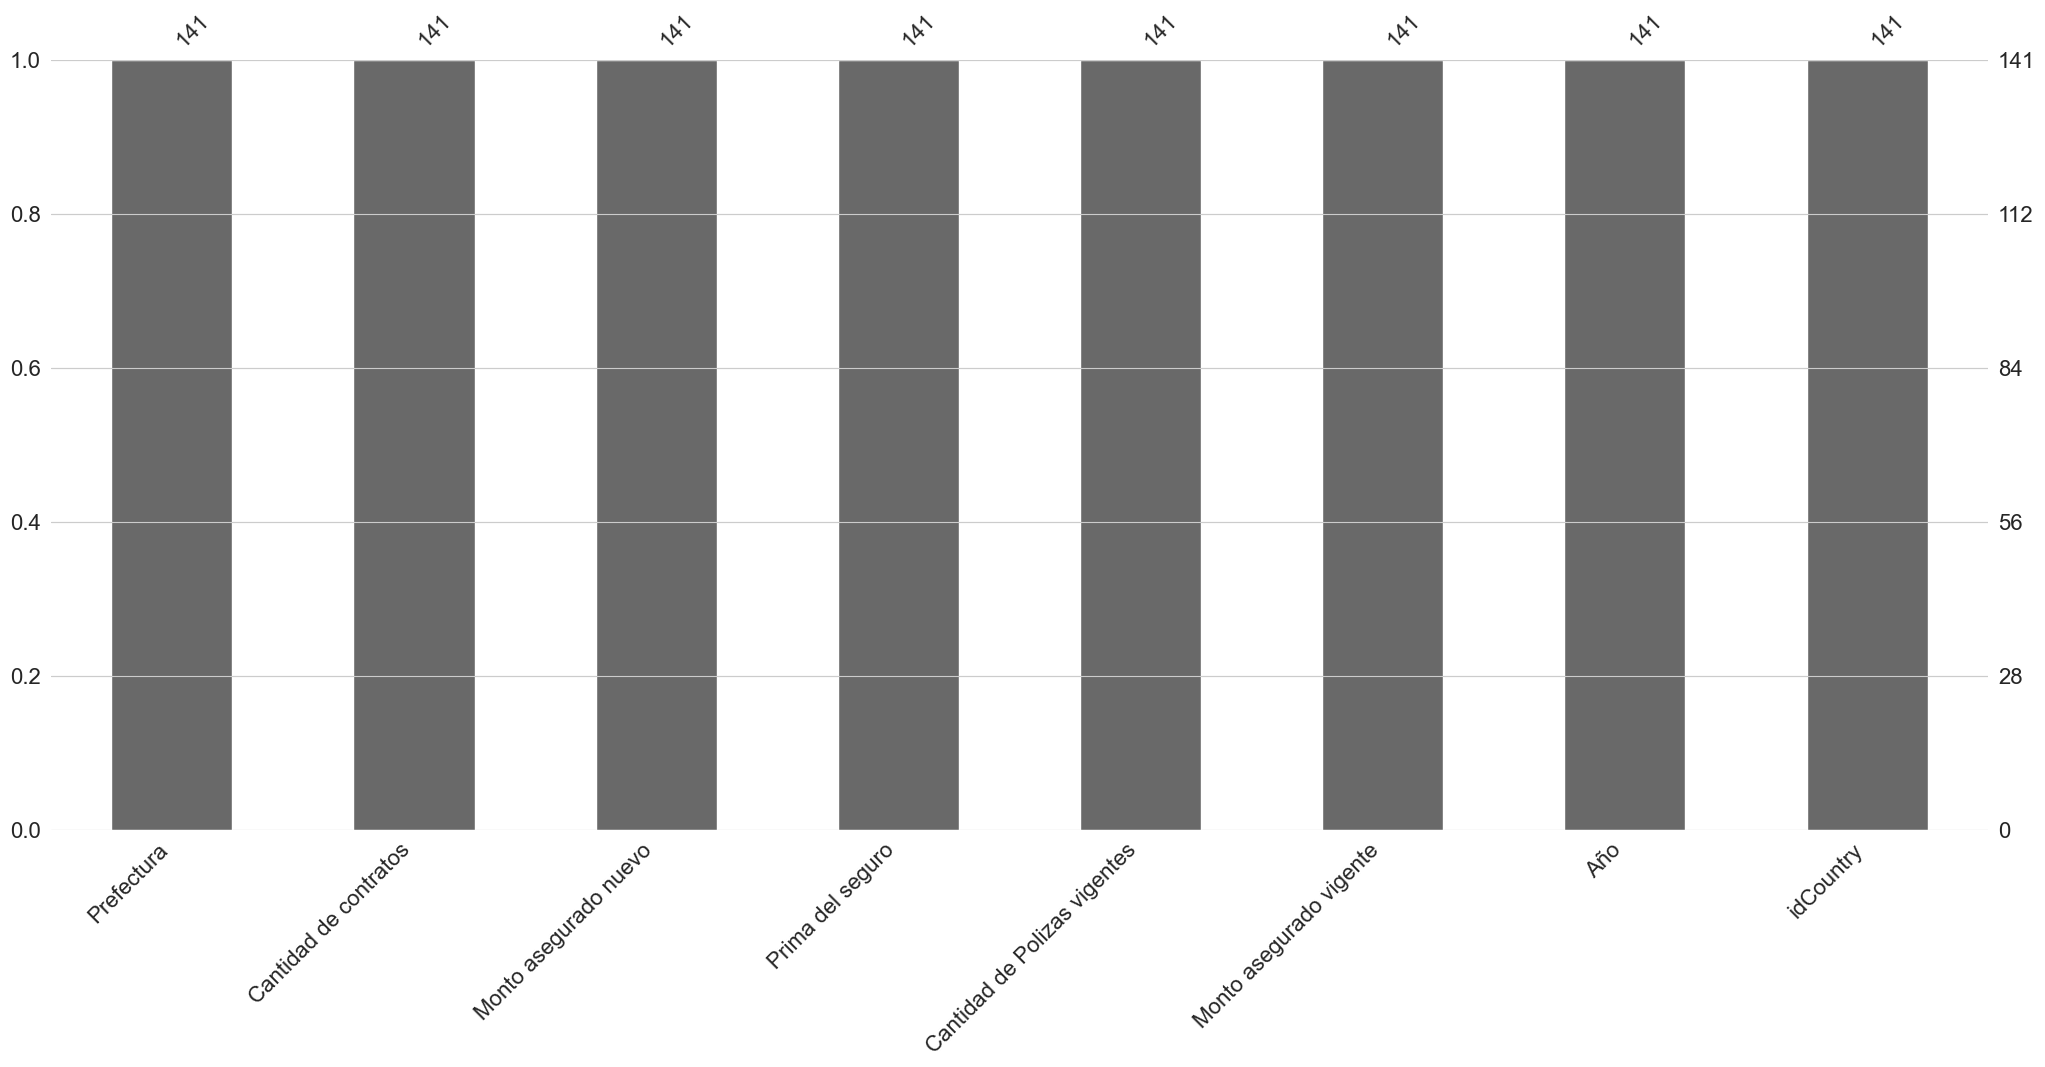

In [117]:
# Observemos los valores faltantes por columna
msno.bar(df_kpi1_terrem)

In [111]:
#no faltan datos, esta completo

# Observamos si hay valores duplicados
df_kpi1_terrem.duplicated().sum()

0

In [116]:
# no hay duplicados

# Agrupamos los datos por año y calculamos la media de las Suma Asegurada
df_grouped_suma_prim = df_kpi1_terrem.groupby('Año')['Prima del seguro'].mean()
print(" Año vs prima promedio aseguradas: ", df_grouped_suma_prim)



 Año vs prima promedio aseguradas:  Año
2019    6.773279e+06
2020    7.155598e+06
2021    7.252762e+06
Name: Prima del seguro, dtype: float64


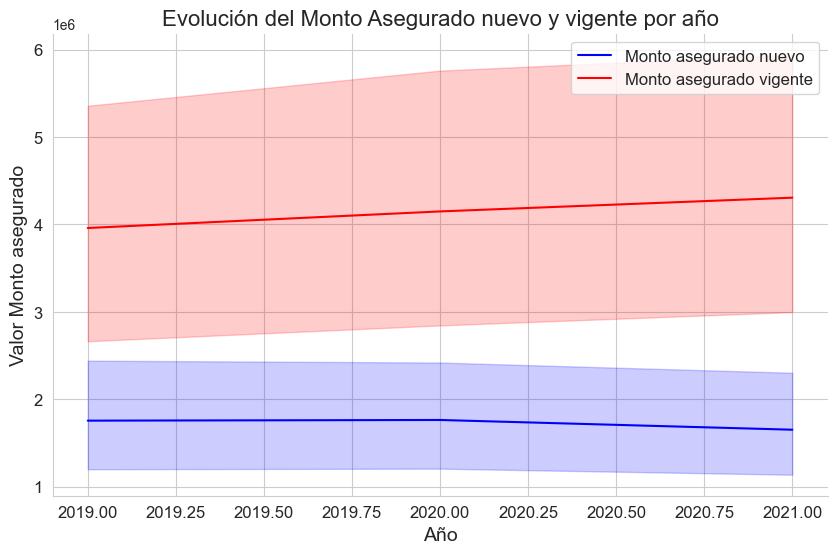

In [120]:
# los valores en promedio de las primas aumentaron para el año 2021

#se hace un grafico de lineas que permita visualizar los montos asegurados vigentes y nuevos por año
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_kpi1_terrem, x='Año', y='Monto asegurado nuevo', color='blue', label='Monto asegurado nuevo')
sns.lineplot(data=df_kpi1_terrem, x='Año', y='Monto asegurado vigente', color='red', label='Monto asegurado vigente')
# Configuramos los ejes y la leyenda
plt.xlabel('Año', fontsize=14)
plt.ylabel('Valor Monto asegurado', fontsize=14)
plt.title('Evolución del Monto Asegurado nuevo y vigente por año', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
sns.despine()
plt.show()


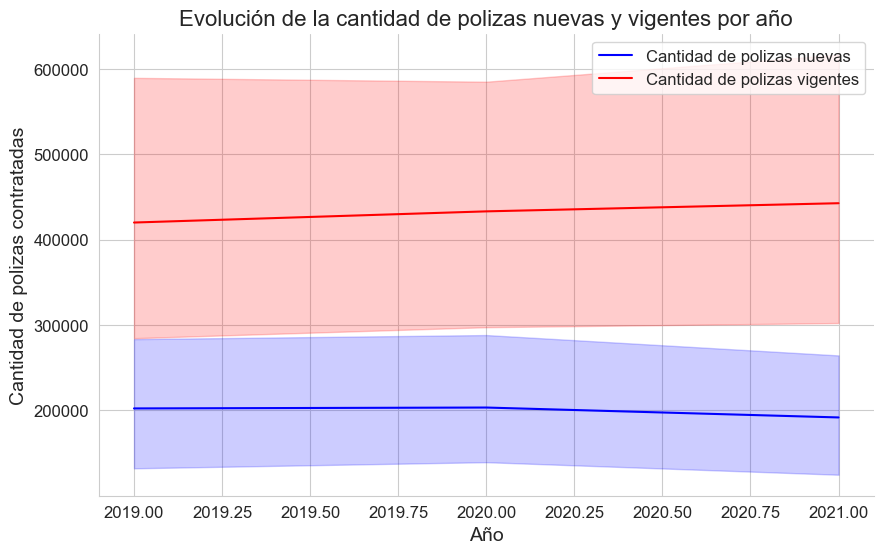

In [121]:
#se hace un grafico de lineas que permita visualizar la cantidad de polizas vigentes y nuevas por año
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_kpi1_terrem, x='Año', y='Cantidad de contratos', color='blue', label='Cantidad de polizas nuevas')
sns.lineplot(data=df_kpi1_terrem, x='Año', y='Cantidad de Polizas vigentes', color='red', label='Cantidad de polizas vigentes')
# Configuramos los ejes y la leyenda
plt.xlabel('Año', fontsize=14)
plt.ylabel('Cantidad de polizas contratadas', fontsize=14)
plt.title('Evolución de la cantidad de polizas nuevas y vigentes por año', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
sns.despine()
plt.show()

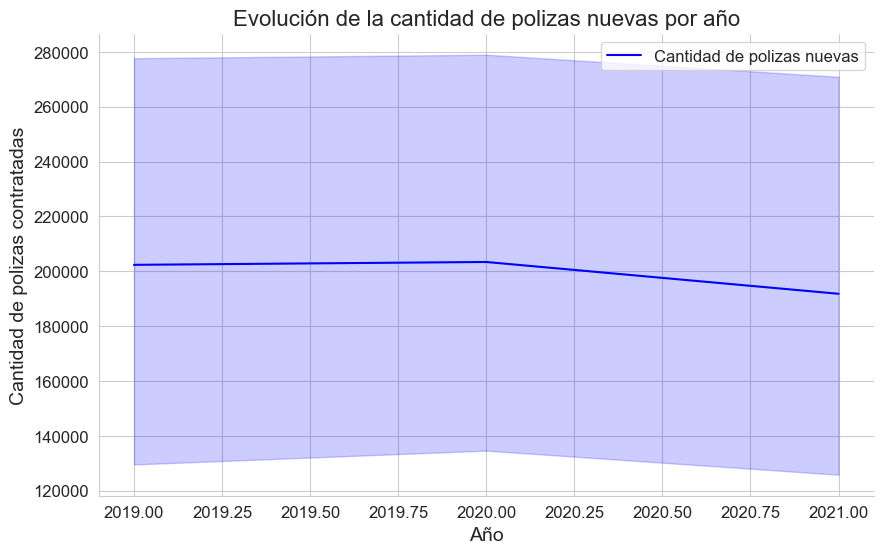

In [123]:
#se hace un grafico de lineas que permita visualizar la cantidad de polizas nuevas por año
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_kpi1_terrem, x='Año', y='Cantidad de contratos', color='blue', label='Cantidad de polizas nuevas')

# Configuramos los ejes y la leyenda
plt.xlabel('Año', fontsize=14)
plt.ylabel('Cantidad de polizas contratadas', fontsize=14)
plt.title('Evolución de la cantidad de polizas nuevas por año', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
sns.despine()
plt.show()

In [ ]:
# se observa una disminución de compra de polizas desde el año 2020

In [124]:
# Analizamos el archivo de seguros_mex
# Ingestamos el archivo parquet
df_kpi1_mexico = pd.read_parquet("Datasets/KPI 1/seguros_mex.parquet")

df_kpi1_mexico.sample(3)

,AñO,MONEDA,ZONA SISMICA,TIPO DE SEGURO,SUBTIPO DE SEGURO,NUMERO DE PISOS,NUMERO DE UBICACIONES,PRIMA EMITIDA,PRIMA RETENIDA,PRIMA DEVENGADA,COMISION DIRECTA,VALORES TOTALES EDIFICIO,VALORES TOTALES CONTENIDOS,VALORES TOTALES PeERDIDAS CONSECUENCIALES,LIMITE MAXIMO DE RESPONSABILIDAD,idCountry
275810,2021,Nacional,G_,Terremoto,Otro,4,3,596,0,6143,0,0,12000000,1200000,13200000,3
194665,2020,Extranjera,B1,Terremoto,Otro,2,1,0,0,2649,0,6886475,6886475,0,13772950,3
202143,2020,Extranjera,F_,Terremoto,Microseguro,1,4,210668,0,204515,6320,1683931779,52793672,249660333,1986385784,3


In [125]:
# Observamos más en detalle
df_kpi1_mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321792 entries, 0 to 321791
Data columns (total 16 columns):
 #   Column                                     Non-Null Count   Dtype 
---  ------                                     --------------   ----- 
 0   AñO                                        321792 non-null  int64 
 1   MONEDA                                     321792 non-null  object
 2   ZONA SISMICA                               321792 non-null  object
 3   TIPO DE SEGURO                             321792 non-null  object
 4   SUBTIPO DE SEGURO                          321792 non-null  object
 5   NUMERO DE PISOS                            321792 non-null  int64 
 6   NUMERO DE UBICACIONES                      321792 non-null  int64 
 7   PRIMA EMITIDA                              321792 non-null  int64 
 8   PRIMA RETENIDA                             321792 non-null  int64 
 9   PRIMA DEVENGADA                            321792 non-null  int64 
 10  COMISION DIRECTA    

In [126]:
# Observamos el comportamiento de las variables numéricas
df_kpi1_mexico.describe()

,AñO,NUMERO DE PISOS,NUMERO DE UBICACIONES,PRIMA EMITIDA,PRIMA RETENIDA,PRIMA DEVENGADA,COMISION DIRECTA,VALORES TOTALES EDIFICIO,VALORES TOTALES CONTENIDOS,VALORES TOTALES PeERDIDAS CONSECUENCIALES,LIMITE MAXIMO DE RESPONSABILIDAD,idCountry
count,321792.000000,321792.000000,321792.000000,3.217920e+05,3.217920e+05,3.217920e+05,3.217920e+05,3.217920e+05,3.217920e+05,3.217920e+05,3.217920e+05,321792.0
mean,2019.965667,3.449383,34.886887,9.413776e+04,1.374062e+04,1.022341e+05,2.841771e+03,2.973246e+08,2.000049e+08,9.249557e+07,1.075040e+09,3.0
std,0.812306,5.766984,675.864210,2.920290e+06,9.028476e+05,2.688615e+06,5.835531e+04,6.266646e+09,2.389763e+09,1.766256e+09,9.221483e+09,0.0
min,2019.000000,1.000000,1.000000,-2.587453e+07,-8.275172e+06,-9.652564e+06,-1.228722e+06,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.0
25%,2019.000000,1.000000,1.000000,3.100000e+01,0.000000e+00,3.020000e+02,0.000000e+00,0.000000e+00,1.000000e+06,0.000000e+00,4.200000e+06,3.0
50%,2020.000000,2.000000,2.000000,1.510000e+03,9.700000e+01,2.101000e+03,2.100000e+01,4.439930e+06,5.400000e+06,1.533000e+05,2.280000e+07,3.0
75%,2021.000000,3.000000,6.000000,1.185125e+04,1.599000e+03,1.313700e+04,3.850000e+02,3.828155e+07,3.226768e+07,5.030395e+06,1.906148e+08,3.0
max,2021.000000,86.000000,116839.000000,1.128403e+09,3.509247e+08,7.931042e+08,1.056293e+07,1.312740e+12,3.057741e+11,5.298241e+11,1.011690e+12,3.0


<AxesSubplot: >

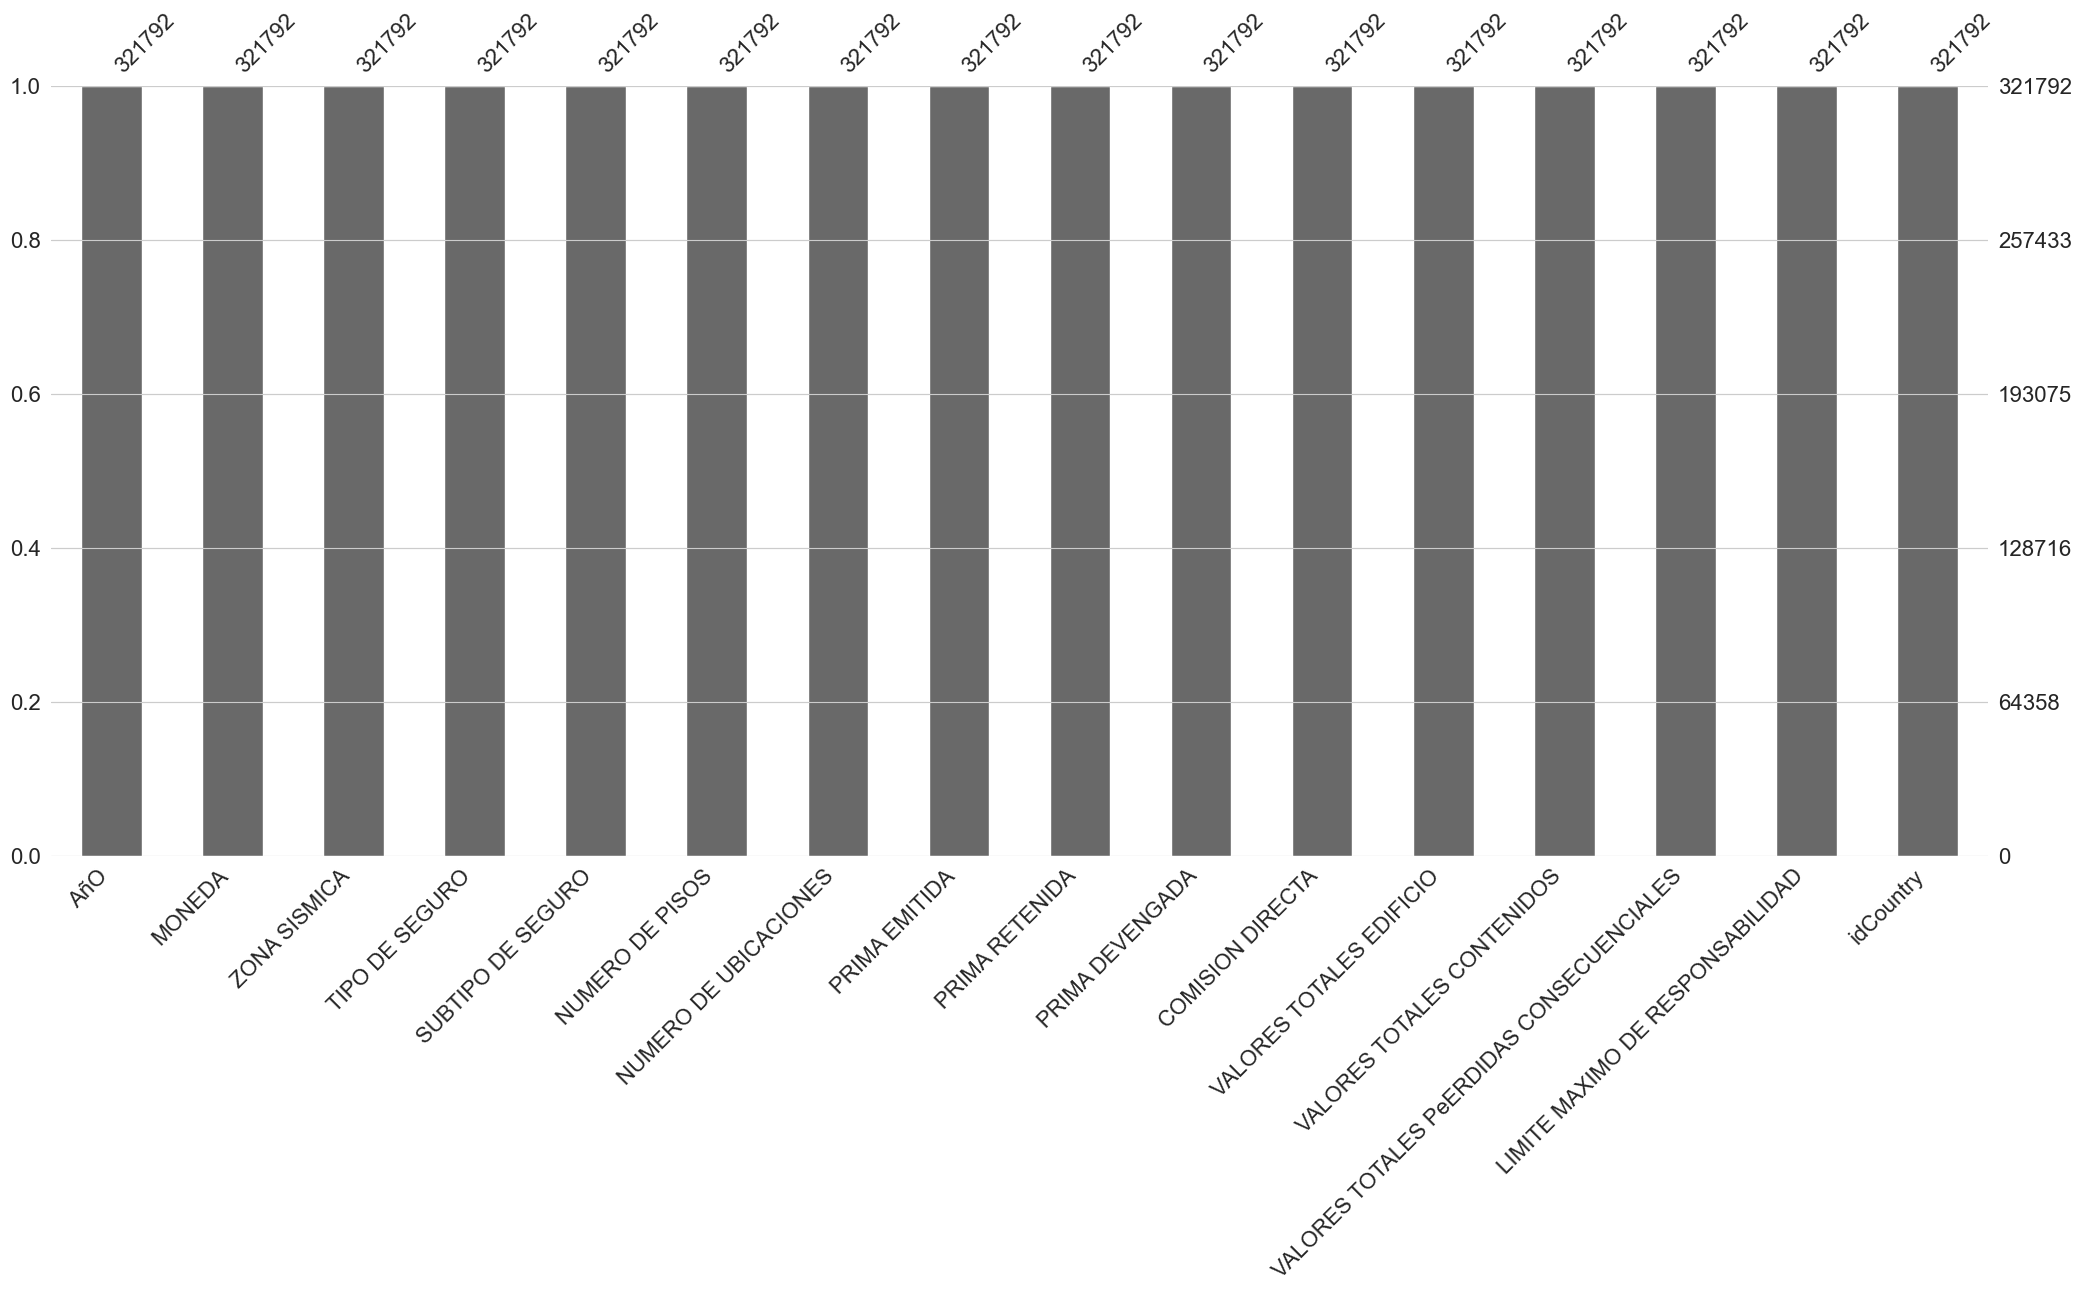

In [127]:
# Observemos los valores faltantes por columna
msno.bar(df_kpi1_mexico)


In [128]:
# Observamos si hay valores duplicados
df_kpi1_mexico.duplicated().sum()

2730

In [130]:
# Observamos los años con mas registros 
df_kpi1_mexico["AñO"].value_counts().sort_values(ascending=False).head()


AñO
2019    111879
2020    109082
2021    100831
Name: count, dtype: int64

In [131]:
def datos_unicos(datafram_analisis):
    for column in datafram_analisis.columns:
        unique_values = datafram_analisis[column].unique()
        respuesta= print(f"Valores únicos por columna '{column}':", unique_values)
    return respuesta
datos_unicos(df_kpi1_mexico)

Valores únicos por columna 'AñO': [2019 2020 2021]
Valores únicos por columna 'MONEDA': ['Nacional' 'Extranjera' 'Indizada']
Valores únicos por columna 'ZONA SISMICA': ['A_' 'B_' 'C_' 'D_' 'E_' 'F_' 'G_' 'H1' 'I_' 'B1' 'H2' 'J_' 'Z2' 'Z3'
 'SZ' 'Z1']
Valores únicos por columna 'TIPO DE SEGURO': ['Terremoto']
Valores únicos por columna 'SUBTIPO DE SEGURO': ['Otro' 'Microseguro' 'Pymes' 'Negocio gubernamental' 'Seguro obligatorio']
Valores únicos por columna 'NUMERO DE PISOS': [ 1  2  4  3  5  7 13 10  8  6 31 25  9 11 12 16 17 20 21 23 40 14 15 35
 44 30 36 50 29 24 27 41 32 18 19 26 28 43 46 47 48 49 51 54 64 22 33 34
 59 55 38 39 37 60 42 52 67 58 53 66 45 57 56 68 69 80 86 74 82 75 70 65
 61 73 77 79 63 72 78 62 76 71 81]
Valores únicos por columna 'NUMERO DE UBICACIONES': [   1    2    3 ... 1426  943 1282]
Valores únicos por columna 'PRIMA EMITIDA': [     0    383   3511 ... 431999 368249  58454]
Valores únicos por columna 'PRIMA RETENIDA': [     0    262   2336 ... 158392  93133  

Text(0, 0.5, 'Valores numericos')

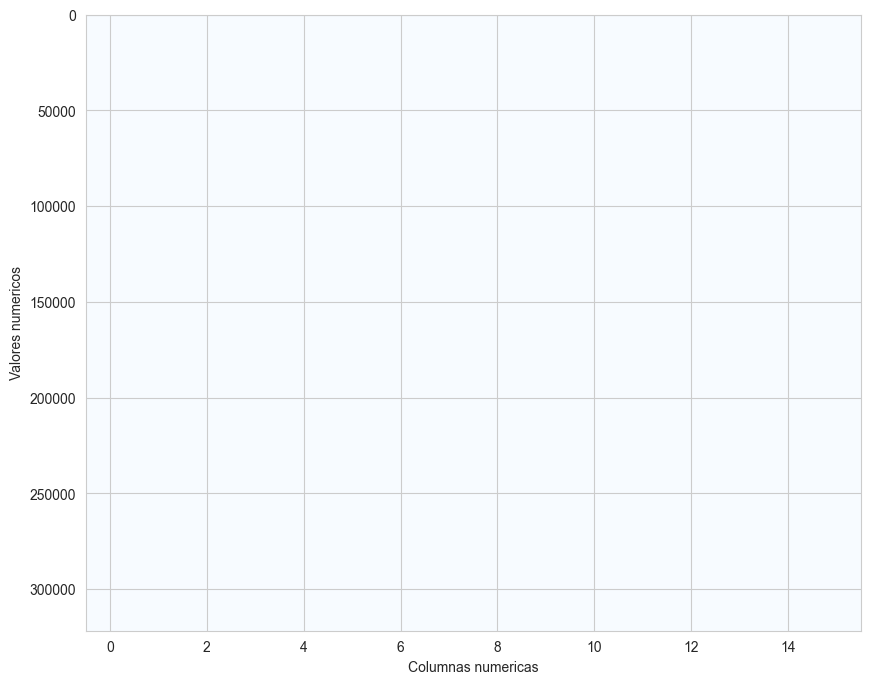

In [133]:
# revisar los valores nulos
plt.figure(figsize=(10,8))
plt.imshow(df_kpi1_mexico.isna(),aspect="auto", 
           interpolation="nearest",cmap="Blues")
plt.xlabel("Columnas numericas")
plt.ylabel("Valores numericos")

In [135]:
# no hay valores nulos

#identificacion de las columnas numericas
df_numeric_mex = df_kpi1_mexico.select_dtypes(include=['int64', 'float64'])


In [136]:
# Calcular la matriz de correlación
corr_matrix = df_numeric_mex.corr()

# Imprimir la matriz de correlación
print(corr_matrix)


                                                AñO  NUMERO DE PISOS   
AñO                                        1.000000         0.024349  \
NUMERO DE PISOS                            0.024349         1.000000   
NUMERO DE UBICACIONES                      0.008555        -0.016781   
PRIMA EMITIDA                              0.002093        -0.008008   
PRIMA RETENIDA                             0.003328        -0.003648   
PRIMA DEVENGADA                           -0.004294        -0.010368   
COMISION DIRECTA                           0.007187        -0.005946   
VALORES TOTALES EDIFICIO                   0.001178        -0.010270   
VALORES TOTALES CONTENIDOS                 0.008728        -0.025151   
VALORES TOTALES PeERDIDAS CONSECUENCIALES  0.004270        -0.014800   
LIMITE MAXIMO DE RESPONSABILIDAD           0.001170        -0.032617   
idCountry                                       NaN              NaN   

                                           NUMERO DE UBICACIONE

In [145]:
# Agrupamos los datos por año y calculamos la media de las magnitudes
df_grouped_mex = df_kpi1_mexico.groupby('AñO')['PRIMA EMITIDA'].mean()


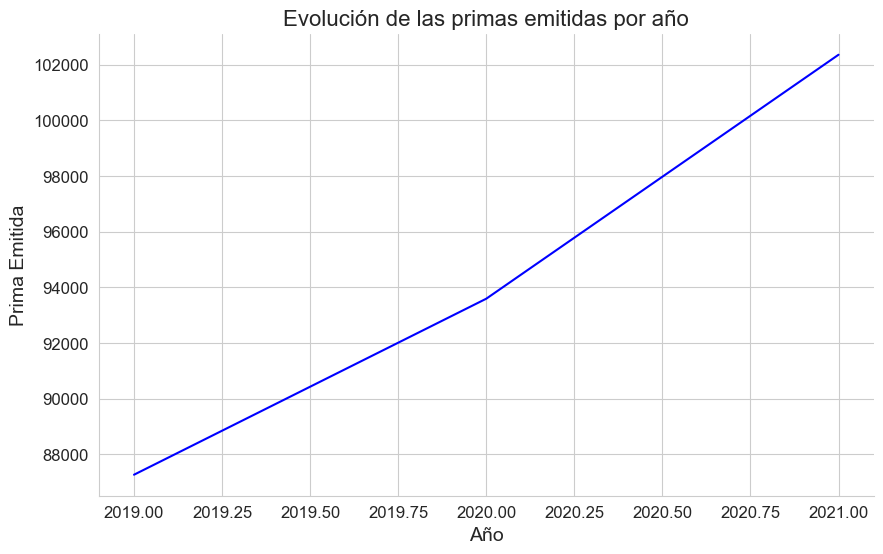

In [147]:
# Creamos el gráfico de líneas utilizando Seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped_mex, color='blue')
# Configuramos los ejes y la leyenda
plt.xlabel('Año', fontsize=14)
plt.ylabel('Prima Emitida', fontsize=14)
plt.title('Evolución de las primas emitidas por año', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()


In [149]:
#las primas emitidas han mantenido un crecimiento, aumentando en el primer cuartenio del año 2020

# Observamos el porcentaje de Valores Totales Edificio en base al total donde se sabe los valores unicos su frecuencia
df_kpi1_mexico["VALORES TOTALES EDIFICIO"].value_counts(normalize=True) * 100


VALORES TOTALES EDIFICIO
0            29.796266
2000000       0.889705
1000000       0.796477
4000000       0.603806
3000000       0.601009
               ...    
84850000      0.000311
280725160     0.000311
235435100     0.000311
684456238     0.000311
816074318     0.000311
Name: proportion, Length: 130549, dtype: float64

In [ ]:
# el valor "0" aparece en aproximadamente el 30% de las filas del DataFrame, mientras que el valor "2000000" aparece en menos del 1% de las filas.

In [150]:
# Observamos el porcentaje de la prima emitida en base al total (0 es negativo, 1 positivo)
df_kpi1_mexico["PRIMA EMITIDA"].value_counts(normalize=True) * 100

PRIMA EMITIDA
0          17.569734
2           0.279684
1           0.278130
4           0.165635
3           0.149786
             ...    
55153       0.000311
59535       0.000311
19889       0.000311
9941031     0.000311
58454       0.000311
Name: proportion, Length: 75628, dtype: float64

In [151]:
# Se tiene un 17% de los valores de la prima emitida en cero, los demas son inferiores al 1%

In [152]:
# Analizamos el archivo de tasa penetracion hogares
# Ingestamos el archivo json
df_kpi1_hogares = pd.read_json("Datasets/KPI 1/tasa penetración hogares.json")
# Observamos
df_kpi1_hogares.sample(3)

,Prefecture,2015,2016,2017,2018,2019,2020,2021,2019 año Calendario Hogar,2020 año Calendario Hogar,2021 año Calendario Hogar,idCountry
32,Okayama,53.6,56.8,58.0,62.2,64.8,66.6,67.6,27.0,28.4,29.4,2
18,Yamanashi,67.7,69.8,70.4,71.5,73.5,74.2,74.9,34.7,35.5,36.1,2
29,Wakayama,59.3,61.0,61.6,64.4,67.1,68.9,70.9,29.4,31.0,32.3,2


In [153]:
# Observamos más en detalle
df_kpi1_hogares.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 0 to 47
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Prefecture                 48 non-null     object 
 1   2015                       48 non-null     float64
 2   2016                       48 non-null     float64
 3   2017                       48 non-null     float64
 4   2018                       48 non-null     float64
 5   2019                       48 non-null     float64
 6   2020                       48 non-null     float64
 7   2021                       48 non-null     float64
 8   2019 año Calendario Hogar  48 non-null     float64
 9   2020 año Calendario Hogar  48 non-null     float64
 10  2021 año Calendario Hogar  48 non-null     float64
 11  idCountry                  48 non-null     int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 4.9+ KB


In [154]:
# Observamos el comportamiento de las variables numéricas
df_kpi1_hogares.describe()

,2015,2016,2017,2018,2019,2020,2021,2019 año Calendario Hogar,2020 año Calendario Hogar,2021 año Calendario Hogar,idCountry
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0
mean,61.527083,63.766667,64.958333,67.216667,68.868750,70.410417,71.279167,30.260417,31.106250,31.897917,2.0
std,8.901368,8.507852,8.357538,7.850798,7.626721,7.471371,7.465551,6.457380,6.355812,6.336302,0.0
min,39.200000,45.000000,47.500000,50.100000,52.000000,53.600000,54.400000,16.600000,17.200000,17.600000,2.0
25%,55.575000,57.725000,59.000000,62.050000,63.925000,65.725000,66.325000,26.550000,27.625000,28.475000,2.0
50%,61.300000,62.700000,63.600000,65.350000,66.900000,68.600000,69.850000,30.450000,31.300000,32.150000,2.0
75%,65.850000,68.125000,69.375000,71.625000,73.350000,74.625000,75.625000,33.275000,34.225000,34.925000,2.0
max,86.200000,86.400000,86.300000,86.800000,87.000000,87.500000,88.700000,52.000000,51.900000,52.700000,2.0


<AxesSubplot: >

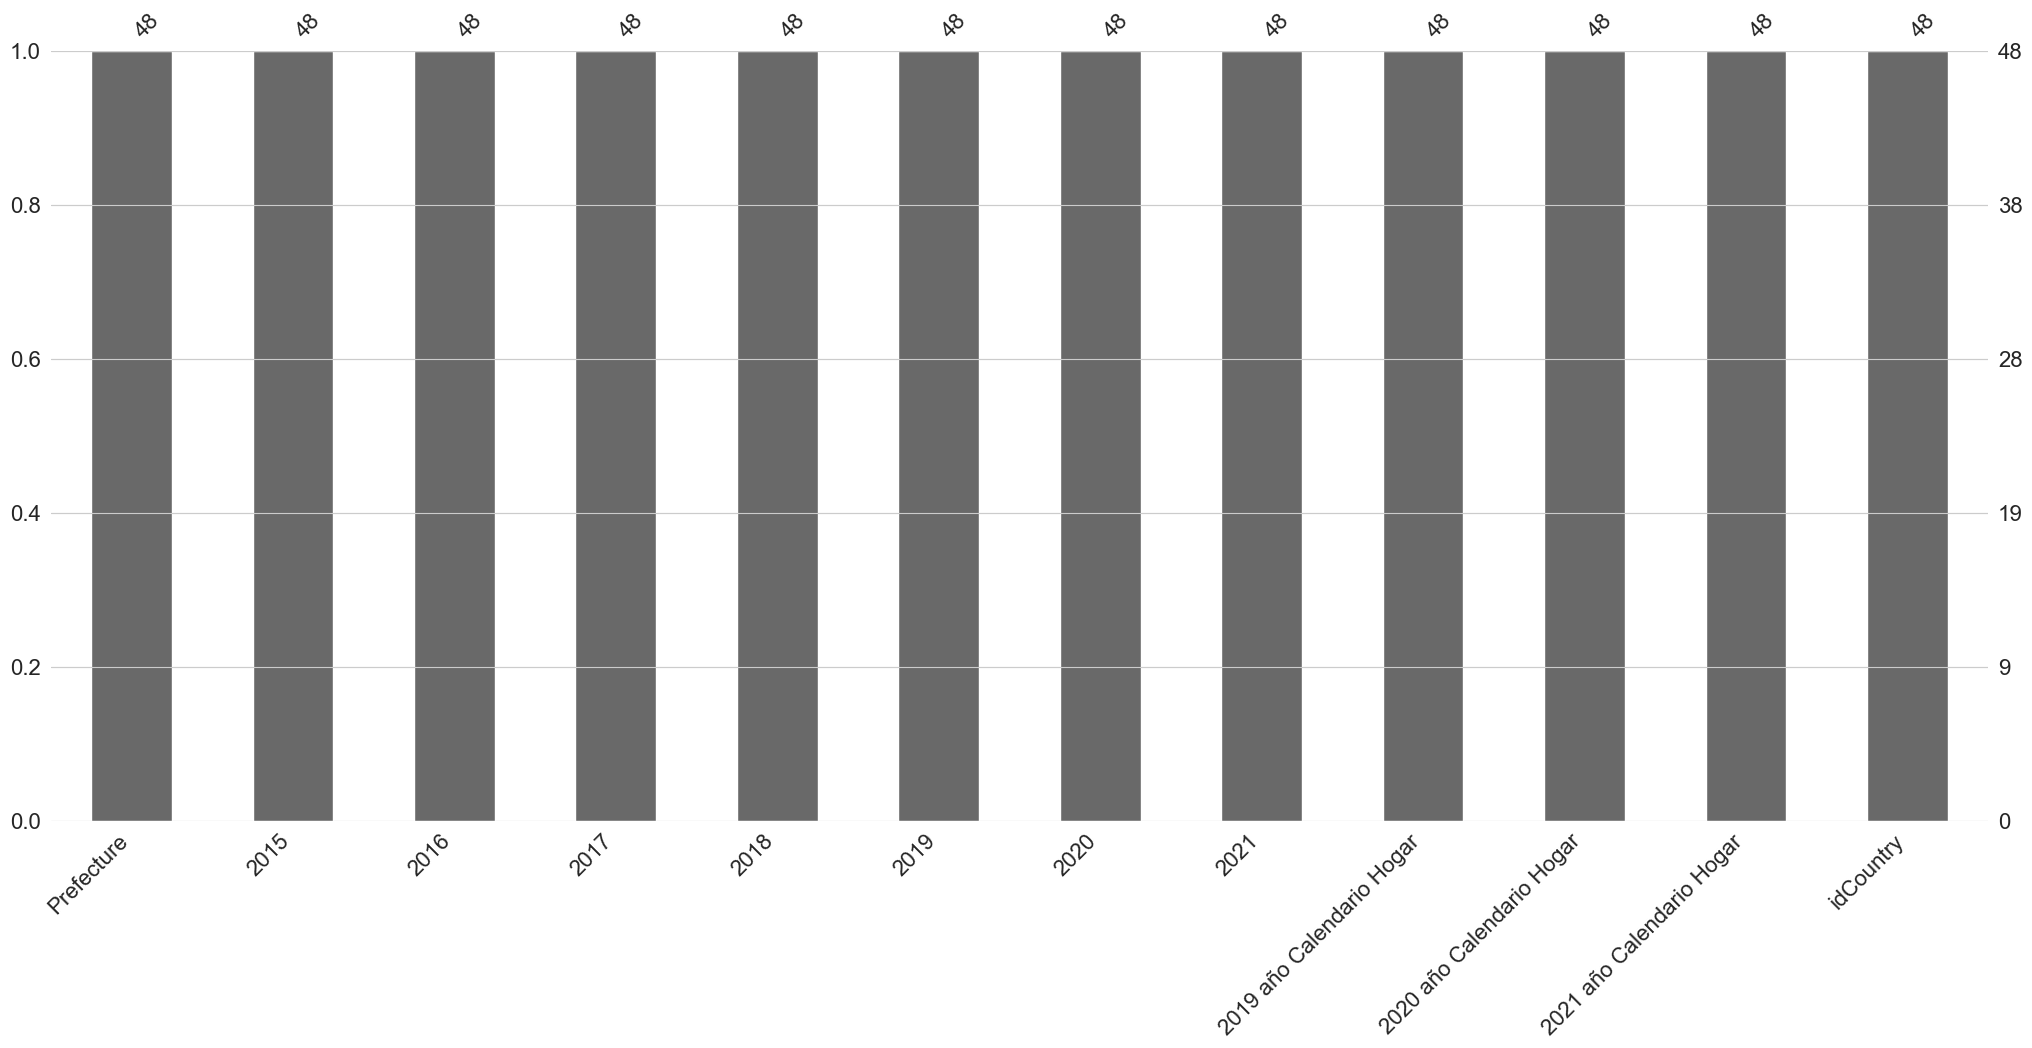

In [155]:
# Observemos los valores faltantes por columna
msno.bar(df_kpi1_hogares)


In [156]:
#no se observan valores faltantes en los datos

In [157]:
# Observamos si hay valores duplicados
df_kpi1_hogares.duplicated().sum()

0

In [163]:
# Top 5 de valores de penetración mas altos desde el 2015 al 2021
df_penetration = df_kpi1_hogares[['Prefecture', '2015', '2016', '2017', '2018', '2019', '2020', '2021']]
df_penetration.set_index('Prefecture', inplace=True) # Convertir la columna 'Prefecture' en índice del dataframe
top_prefectures = df_penetration.nlargest(5, ['2015', '2016', '2017', '2018', '2019', '2020', '2021'])
print(top_prefectures)


            2015  2016  2017  2018  2019  2020  2021
Prefecture                                          
Miyagi      86.2  86.4  86.3  86.8  87.0  87.5  88.7
Kochi       84.2  84.8  85.2  86.2  86.8  87.2  87.8
Miyazaki    76.3  79.0  80.3  81.4  83.0  83.7  84.2
Gifu        73.1  74.6  76.1  76.9  77.7  79.3  79.1
Kagoshima   73.0  76.3  78.0  80.3  81.7  83.2  83.6


In [ ]:
#se observa que los valores de penetración mas altos estan por encima del 86% en Miyagi

In [164]:
# top 5 de los valores de penetración mas bajos
df_penetration_bajo = df_kpi1_hogares[['Prefecture', '2015', '2016', '2017', '2018', '2019', '2020', '2021']]
df_penetration_bajo.set_index('Prefecture', inplace=True)
bottom_prefectures = df_penetration_bajo.nsmallest(5, ['2015', '2016', '2017', '2018', '2019', '2020', '2021'])
print(bottom_prefectures[['2015', '2016', '2017', '2018', '2019', '2020', '2021']])


            2015  2016  2017  2018  2019  2020  2021
Prefecture                                          
Nagasaki    39.2  45.0  47.5  50.1  52.0  53.6  54.4
Saga        44.7  50.1  52.6  55.7  58.4  60.9  62.3
Hokkaido    51.0  52.4  53.3  56.6  59.1  60.6  61.8
Toyama      51.2  54.1  56.1  58.6  60.3  61.8  62.5
Okinawa     51.5  54.2  55.6  56.6  57.6  58.4  58.0


In [ ]:
#se encuentra que el indice de penetración mas bajo esta en la prefecture Nagasaki con 54.4% de penetración en el 2021

# KPI 2

In [ ]:
# 

---

# KPI 3

In [ ]:
#

---

# KPI 4

In [ ]:
#

---

# KPI 5

# KPI 5 Reducir la pérdida de producto interno bruto frente a eventos sísmicos
Reducir en un 50% la pérdida de PIB en los próximos 35 años.

Tomando en cuenta las medidas preventivas contra la inflación y programas gubernamentales para manejar adecuadamente este tipo de eventos sísmicos, además, de fondos preparados que sirvan como fondo de emergencias para este tipo de eventos

Objetivo: reducir la pérdida de PIB
Indicador: 50%
Plazo: 35 años
Meta: reducir 50% de las pérdidas del PIB en 35 años
Monitoreo: con las bases de datos por país, se analiza y se comparan los datos en los próximos 35 años.
Relevante: porque está alineado con el objetivo 2 de Implementar mecanismos de comunicación y alerta a la comunidad civil por que en la medida que se apliquen las acciones preventivas el daño en edificios será menor y se podrá reactivar la economía más rápidamente pues habría avisos previos que afectan las medidas de seguridad y no quedar tan afectados económicamente.


In [15]:
# KPI 5 Reducir la pérdida de producto interno bruto frente a eventos sísmicos
# Ingestamos el archivo json (GDP (1960 - 2021).json)
df_gdp = pd.read_json("Datasets/KPI 5/GDP (1960 - 2021).json")

# Observamos
df_gdp.sample(3)

,idCountry,code,year,gdp(current US$)
55,3,MEX,1978,1.025000e+11
94,3,MEX,1991,3.131428e+11
1,3,MEX,1960,1.304000e+10


In [16]:
# Observamos más en detalle
df_gdp.info()


<class 'pandas.core.frame.DataFrame'>
Index: 186 entries, 0 to 185
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idCountry         186 non-null    int64  
 1   code              186 non-null    object 
 2   year              186 non-null    int64  
 3   gdp(current US$)  186 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 7.3+ KB


In [17]:
# Observamos el comportamiento de las variables numéricas
df_gdp.describe


<bound method NDFrame.describe of      idCountry code  year  gdp(current US$)
0            2  JPN  1960      4.430734e+10
1            3  MEX  1960      1.304000e+10
2            1  USA  1960      5.433000e+11
3            2  JPN  1961      5.350862e+10
4            3  MEX  1961      1.416000e+10
..         ...  ...   ...               ...
181          3  MEX  2020      1.090515e+12
182          1  USA  2020      2.106047e+13
183          2  JPN  2021      4.940878e+12
184          3  MEX  2021      1.272839e+12
185          1  USA  2021      2.331508e+13

[186 rows x 4 columns]>

In [ ]:
#las variables estan con el tipo de dato adecuado y no hay nulos, es apropiado para trabajar

<AxesSubplot: >

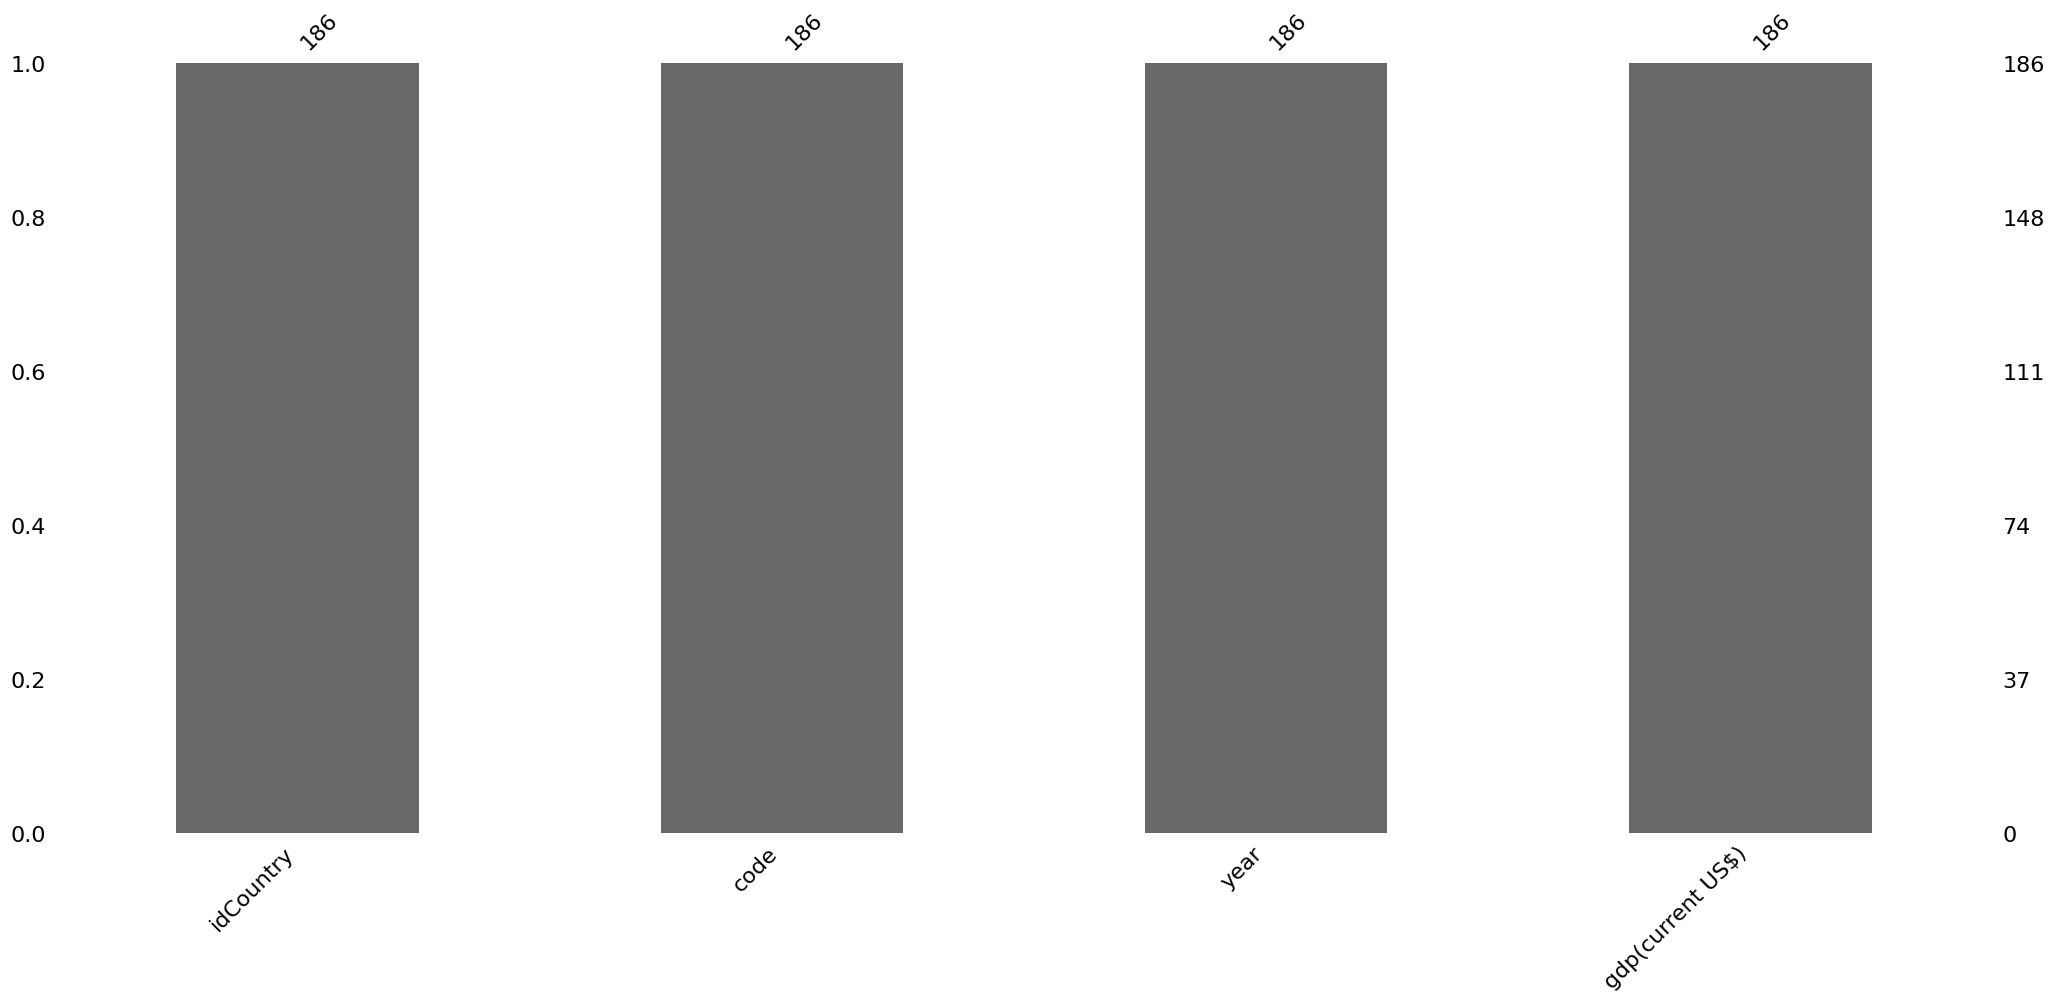

In [12]:
# Observemos los valores faltantes por columna
msno.bar(df_gdp)


In [13]:
# la información esta completa en todas las columnas
# Observamos si hay valores duplicados
df_gdp.duplicated().sum()


0

In [14]:
# no hay valores duplicados
# Observamos el pais con mas registros 
df_gdp["code"].value_counts().sort_values(ascending=False).head()


code
JPN    62
MEX    62
USA    62
Name: count, dtype: int64

In [18]:
#Todos los paises poseen la misma cantidad de registros

# Observamos el porcentaje de PIB en base al total (0 es negativo, 1 positivo)
df_gdp["gdp(current US$)"].value_counts(normalize=True) * 100


gdp(current US$)
4.430734e+10    0.537634
7.721064e+11    0.537634
6.002329e+11    0.537634
9.631174e+12    0.537634
4.968359e+12    0.537634
                  ...   
2.639593e+11    0.537634
3.207041e+12    0.537634
1.134518e+12    0.537634
1.846092e+11    0.537634
2.331508e+13    0.537634
Name: proportion, Length: 186, dtype: float64

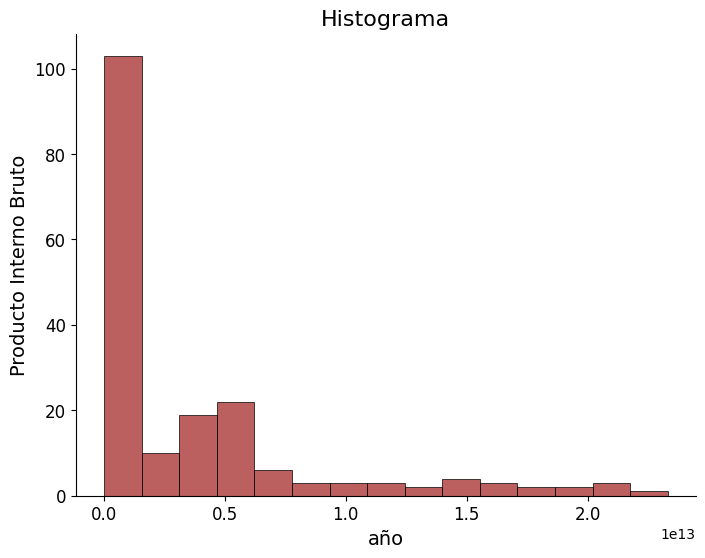

In [18]:
# Histograma del PIB (GDP)
plt.figure(figsize=(8,6))
sns.histplot(df_gdp["gdp(current US$)"] ,bins=15, edgecolor='black', linewidth=0.5, color = "brown")
plt.title("Histograma", fontsize=16)
plt.xlabel("año", fontsize=14)
plt.ylabel("Producto Interno Bruto", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()


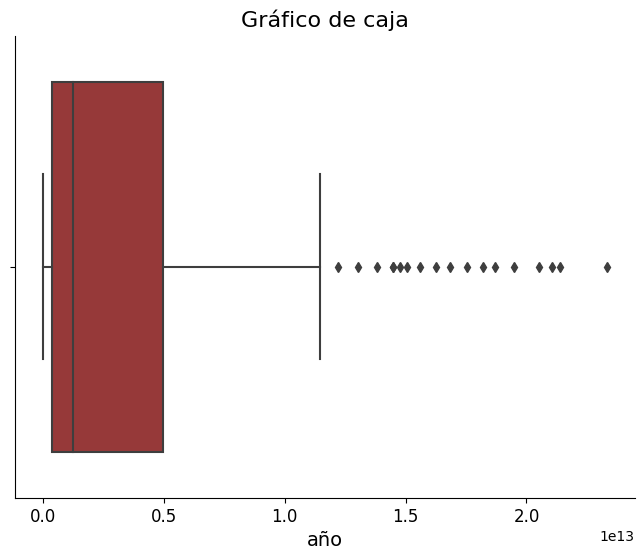

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df_gdp["gdp(current US$)"], color="brown")
plt.title("Gráfico de caja", fontsize=16)
plt.xlabel("año", fontsize=14)
plt.xticks(fontsize=12)

sns.despine()
plt.show()


In [ ]:
# Se observan muchos valores atipicos, pero es normal pues no se espera que los valores de PIB sea estable ( la economia es variable)

<AxesSubplot: xlabel='idCountry', ylabel='gdp(current US$)'>

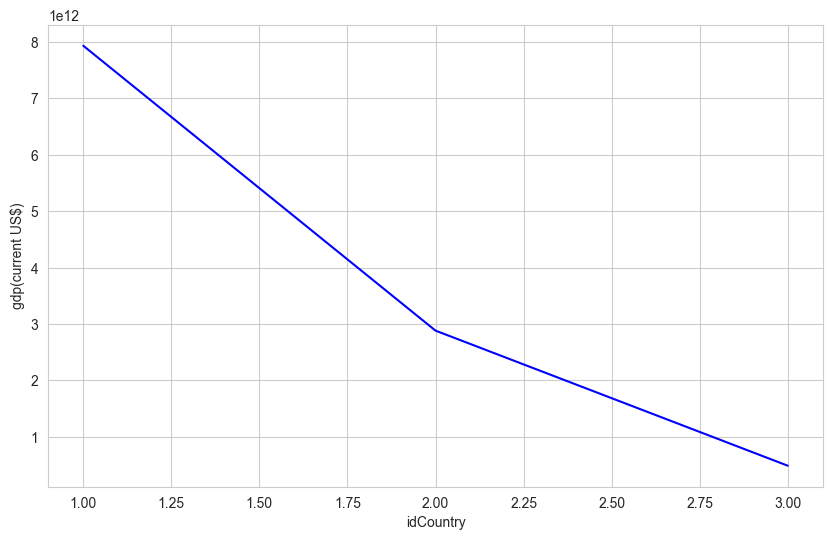

In [23]:
# Agrupamos los datos por año y calculamos la media de las magnitudes
df_grouped5 = df_gdp.groupby('idCountry')['gdp(current US$)'].mean()

# Creamos el gráfico de líneas utilizando Seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped5, color='blue')

# se observa la diferencia de Estados Unidos idCountry=1 muy alto con respecto a Japon (idCountry=2) y mucho mas con Mexico(idCountry=3) en el cual este ultimo es muy bajo

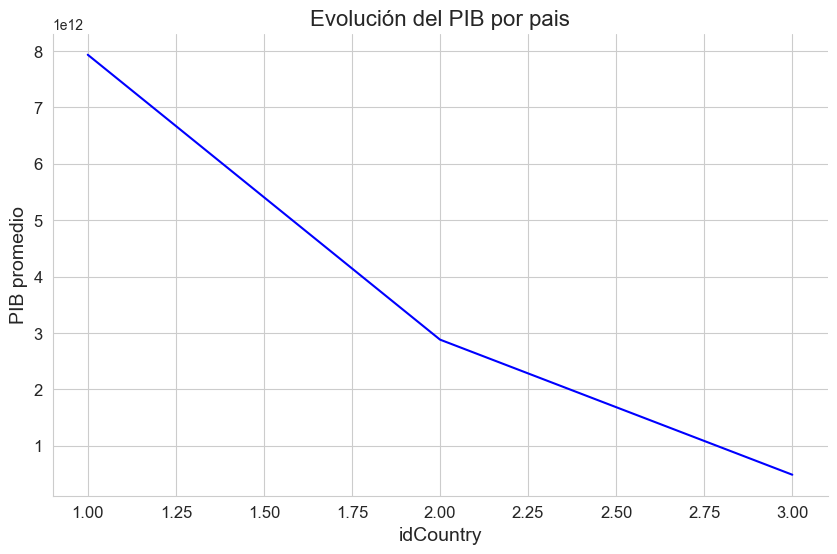

In [29]:
# Creamos el gráfico de líneas utilizando Seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped5, color='blue')
plt.xlabel('idCountry', fontsize=14)
plt.ylabel('PIB promedio', fontsize=14)
plt.title('Evolución del PIB por pais', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()
